# Make Location

## Slide in Loc 1

In [1]:
cities = ["Jacksonville, FL", "Savannah, GA", "Florence, SC", "Lumberton, NC", 
          "Fayetteville, NC", "Rocky Mount, NC", "Richmond, VA"]
w = [12, 32, 6, 15, 24, 11, 20]
@show sum(w)
@show sum(w)/2
@show cumsum(w)
# Find index of city where cumulative demand first equals or exceeds half of total demand
idx = findfirst(x -> x >= sum(w)/2, cumsum(w))

sum(w) = 120
sum(w) / 2 = 60.0
cumsum(w) = [12, 44, 50, 65, 89, 100, 120]


4

In [2]:
println("The optimal location for the facility is: ", cities[idx])

The optimal location for the facility is: Lumberton, NC


## Loc 2 NB 

In [3]:
pt = [(1, 1), (6, 1), (6, 5)]
@show x = [p[1] for p in pt]
@show y = [p[2] for p in pt];

x = [p[1] for p = pt] = [1, 6, 6]
y = [p[2] for p = pt] = [1, 1, 5]


## Makie

* [Makie Plots Reference](https://docs.makie.org/v0.21/reference/plots/scatter)


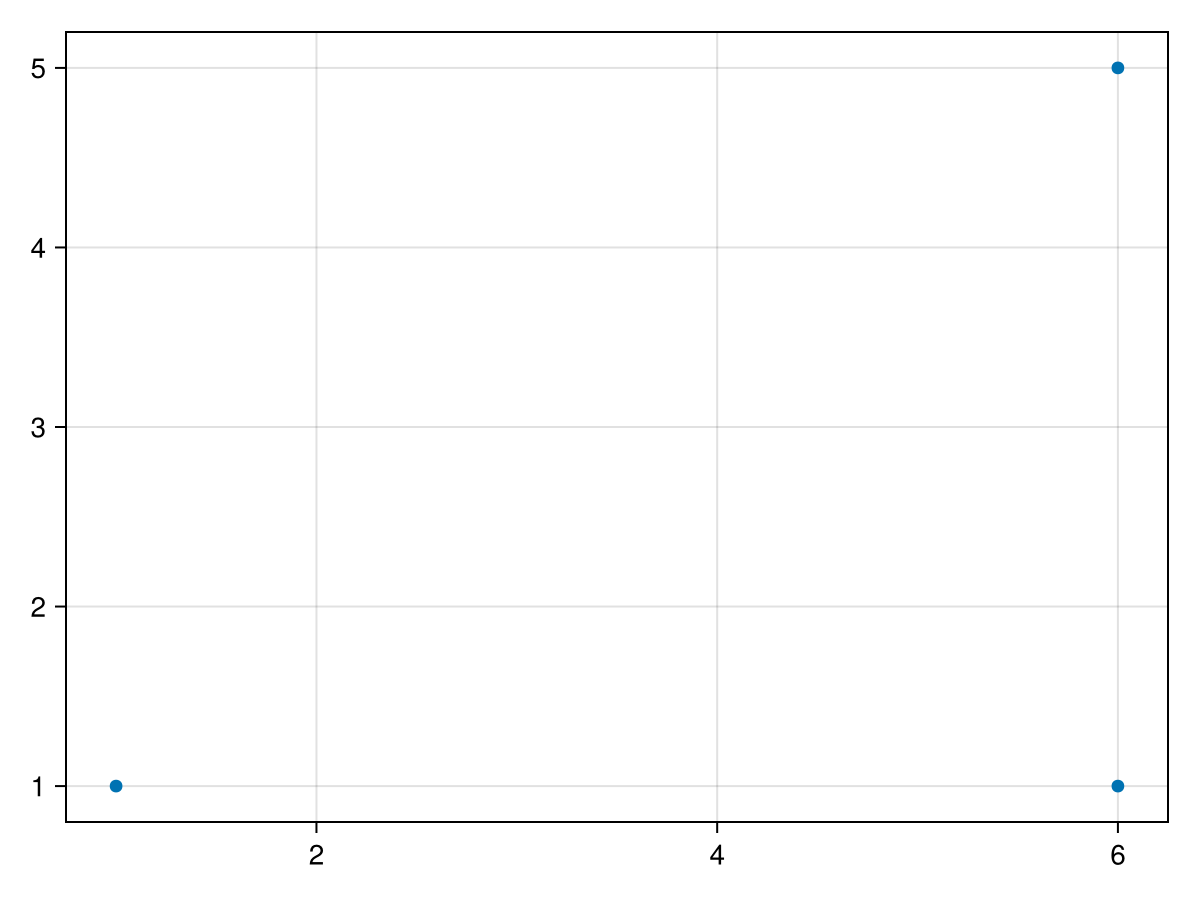

In [212]:
using CairoMakie

scatter(x, y)

In [213]:
xy = [3.0, 1.0]
scatter!(xy[1], xy[2])

Scatter{Tuple{Vector{Point{2, Float32}}}}

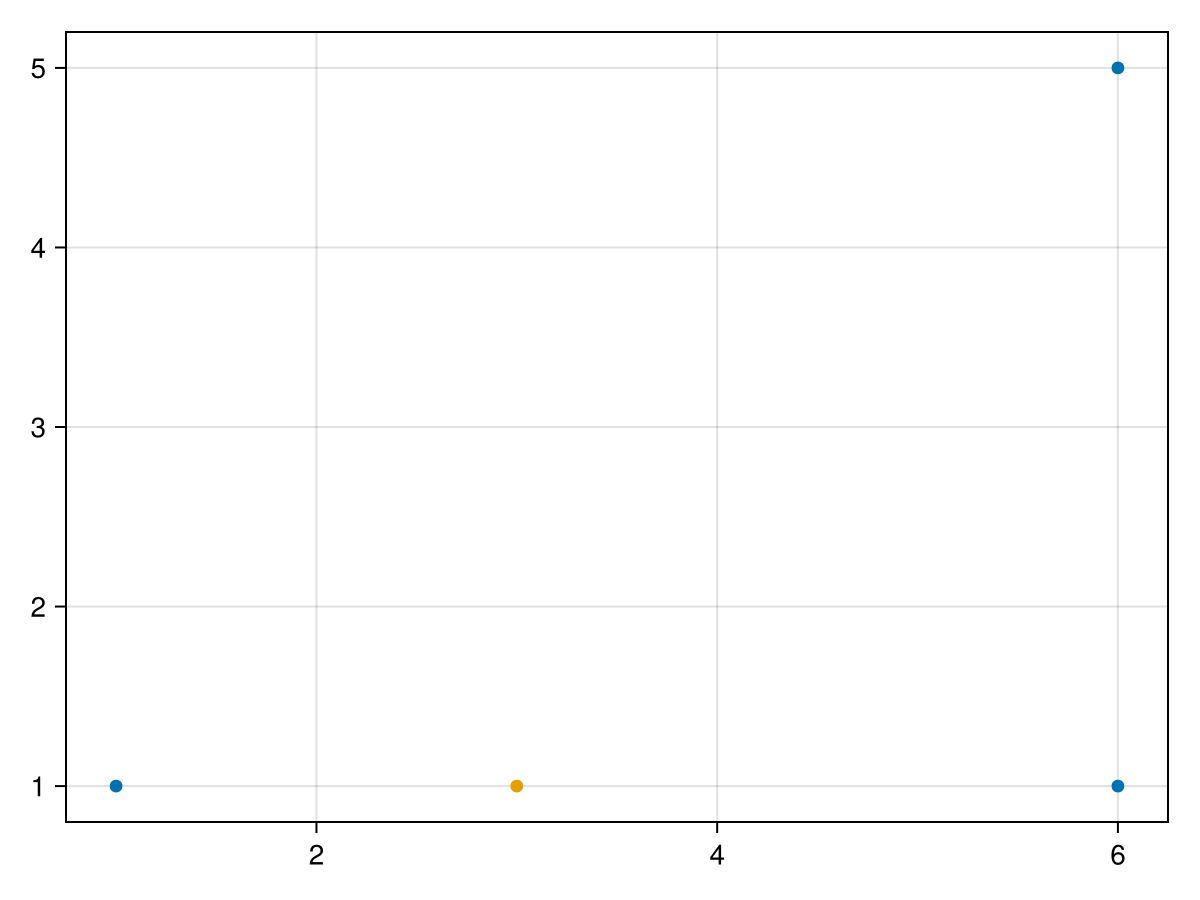

CairoMakie.Screen{IMAGE}


In [214]:
display(current_figure())

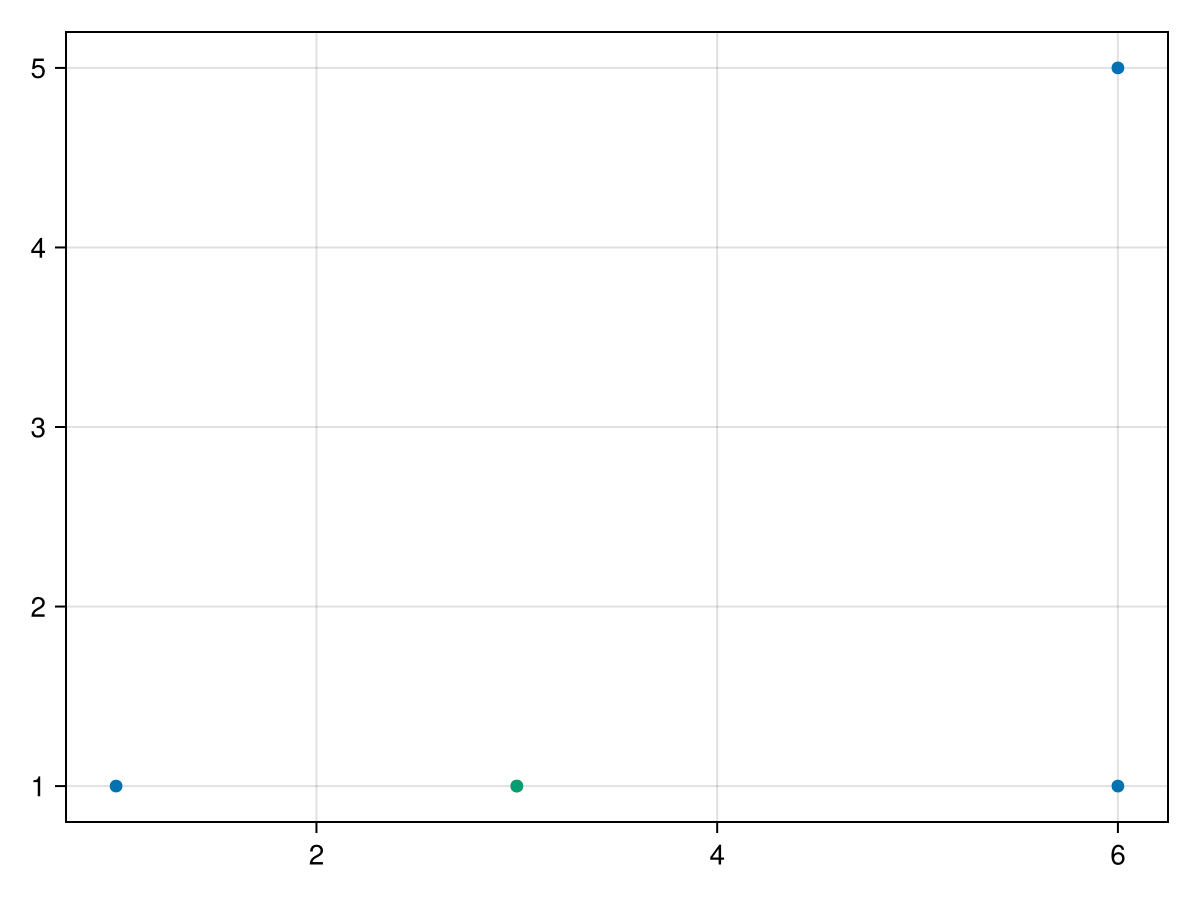

In [215]:
scatter!(xy...)
display(current_figure());

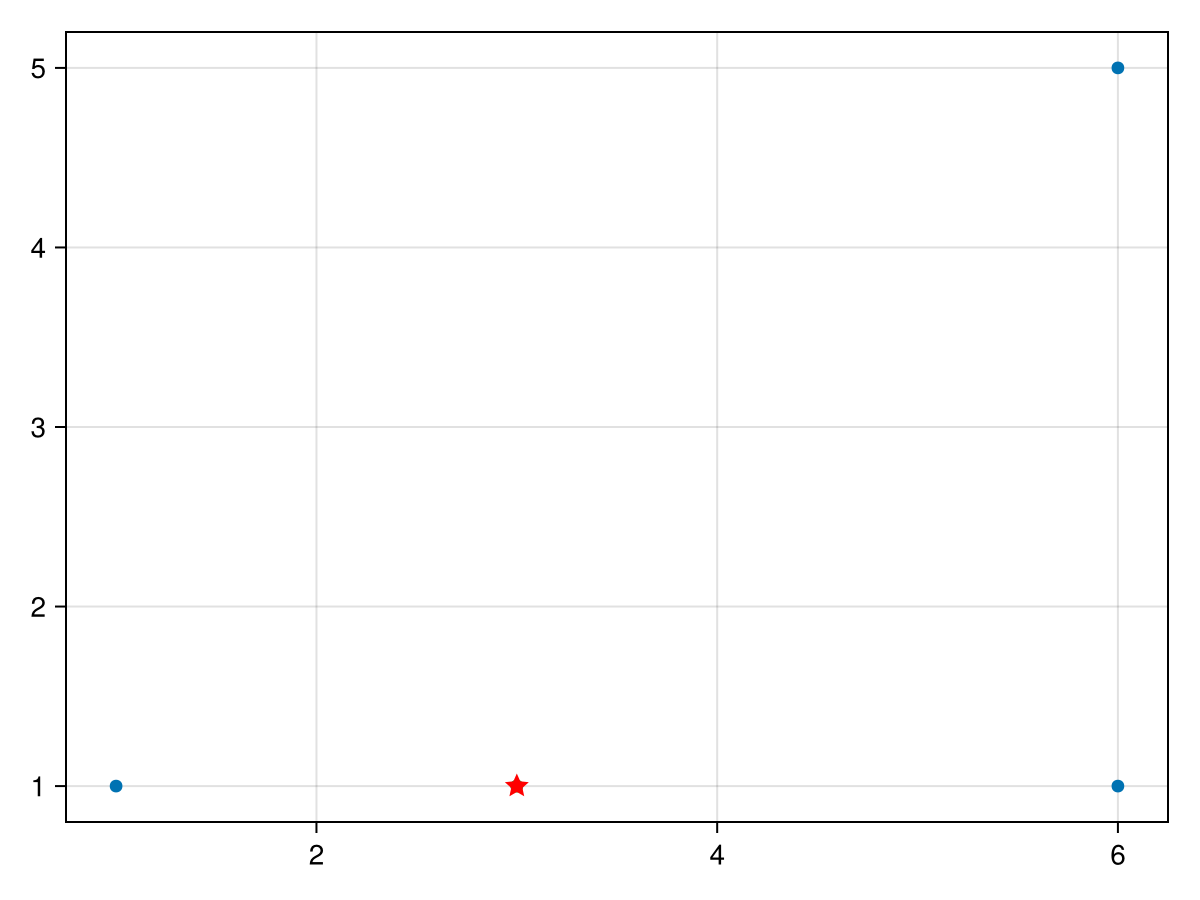

In [216]:
scatter!(xy...; color = :red, marker = :star5, markersize = 14)
display(current_figure());

In [217]:
kwargs = (; color = :red, marker = :star5, markersize = 14)

(color = :red, marker = :star5, markersize = 14)

In [218]:
typeof(kwargs)

@NamedTuple{color::Symbol, marker::Symbol, markersize::Int64}

In [219]:
kwargs.color

:red

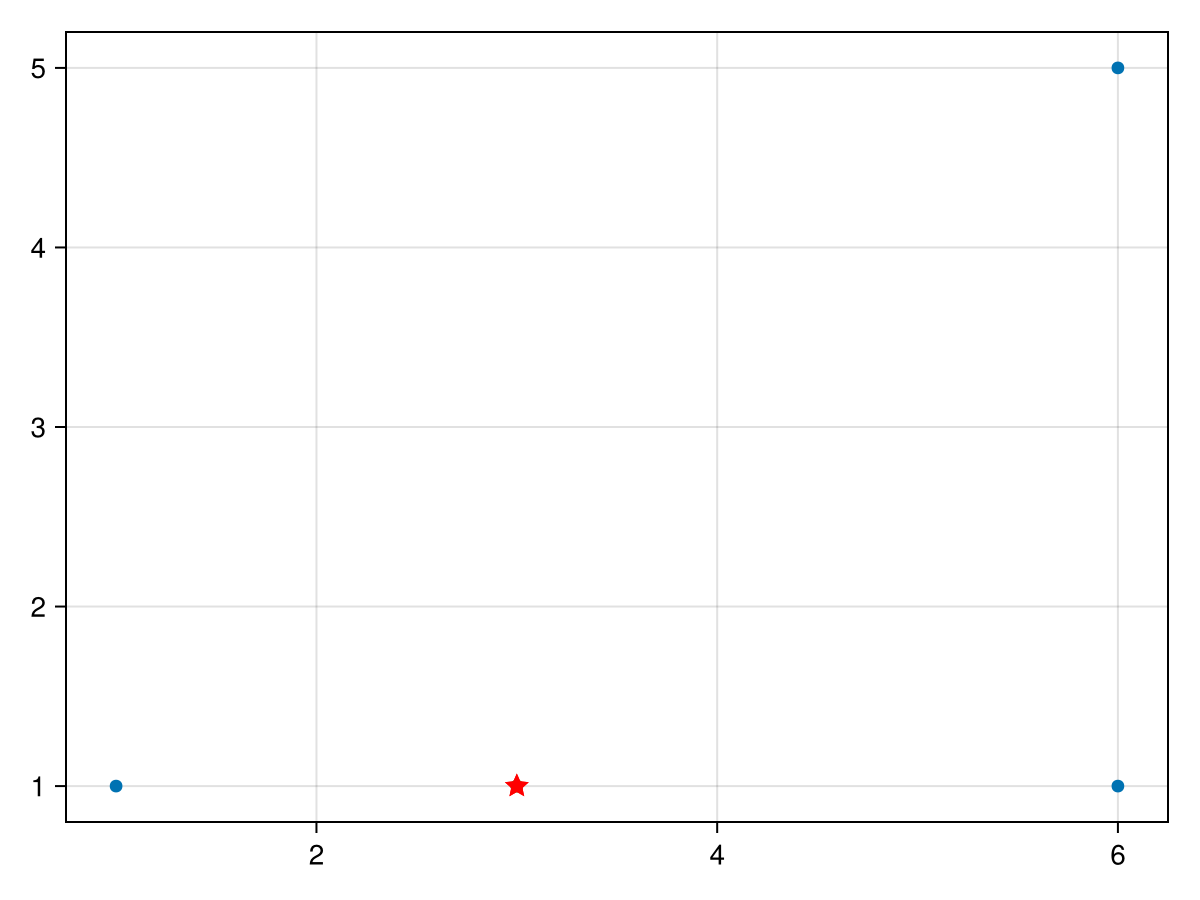

In [220]:
scatter!(xy...; kwargs...)
display(current_figure());

In [165]:
a = (1, 2)
b = (3, 4)
c = (5, 6)
zip(a, b, c)

zip((1, 2), (3, 4), (5, 6))

The `zip` function combines tuples `a`, `b`, and `c` element-wise into an iterator of tuples that contains one element from each of the input tuples. Can be used to create a 2-vector of 3-vectors:

In [166]:
[[i, j, k] for (i,j,k) in zip(a, b, c)]

2-element Vector{Vector{Int64}}:
 [1, 3, 5]
 [2, 4, 6]

In [167]:
collect.(zip(a, b, c))

2-element Vector{Vector{Int64}}:
 [1, 3, 5]
 [2, 4, 6]

In [168]:
abc = [a, b, c]

3-element Vector{Tuple{Int64, Int64}}:
 (1, 2)
 (3, 4)
 (5, 6)

In [169]:
collect.(zip(abc...))

2-element Vector{Vector{Int64}}:
 [1, 3, 5]
 [2, 4, 6]

In [170]:
collect.(zip(pt...))

2-element Vector{Vector{Int64}}:
 [1, 6, 6]
 [1, 1, 5]

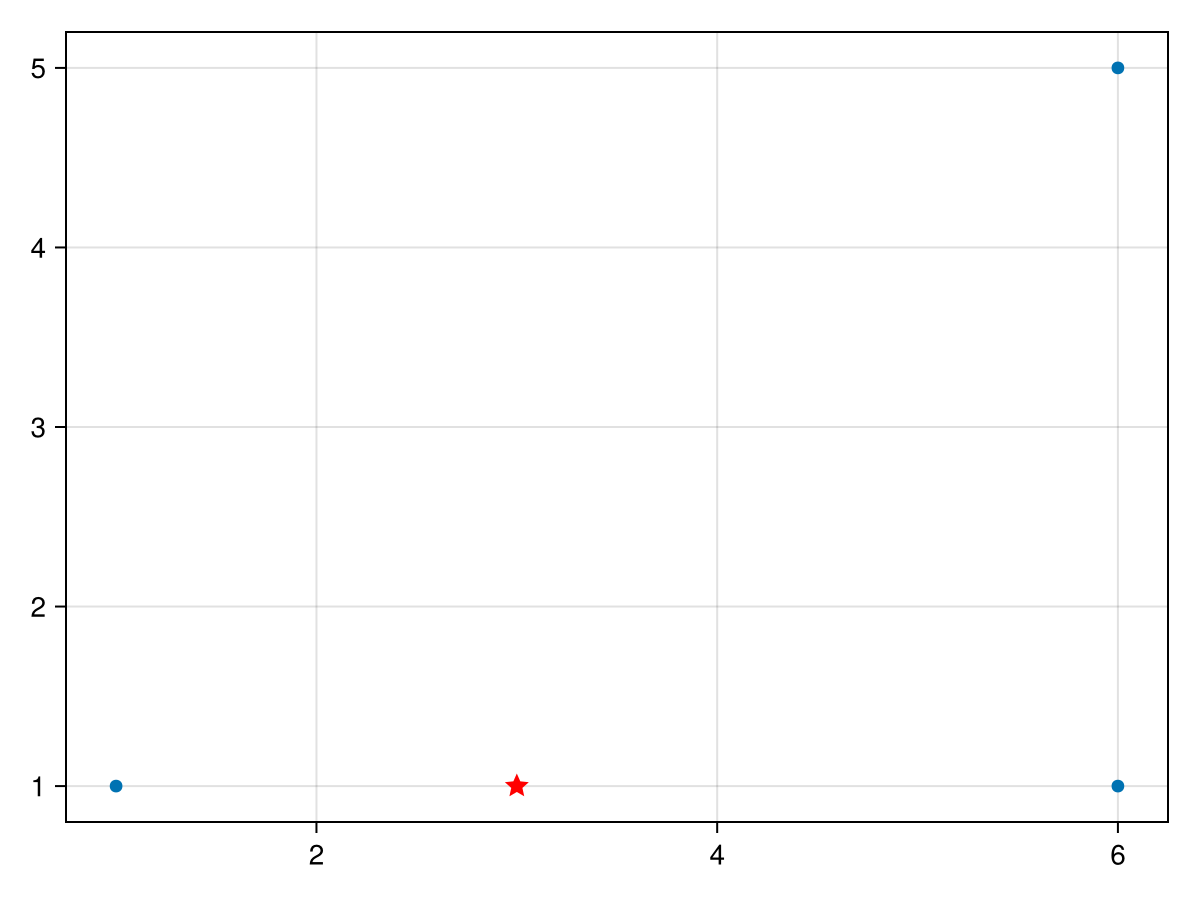

In [221]:
using CairoMakie

unzip(x) = collect.(zip(x...))
dcf() = display(current_figure())

scatter(unzip(pt)...)
scatter!(xy...; kwargs...)
dcf();

In [222]:
d2(x1, x2) = length(x1) == length(x2) ? sqrt(sum((x1 .- x2).^2)) : error("Inputs not same length.")
d2.([xy], pt)

3-element Vector{Float64}:
 2.0
 3.0
 5.0

In [223]:
TD(x) = sum(d2.([x], pt))
TD(xy)

10.0

## Optim.jl
[Optim.jl](http://julianlsolvers.github.io/Optim.jl/stable/)

In [259]:
using Optim

x0 = [3.0, 1.0]
optimize(x -> sum(d2.([x], pt)), x0)

 * Status: success

 * Candidate solution
    Final objective value:     8.697184e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    29
    f(x) calls:    59


In [225]:
res = optimize(x -> sum(d2.([x], pt)), x0)
x° = res.minimizer
TC° = res.minimum
@show x° TC°

x° = [5.089589559820753, 1.9663025403742491]
TD° = 8.697184381221009


8.697184381221009

f2plot (generic function with 1 method)

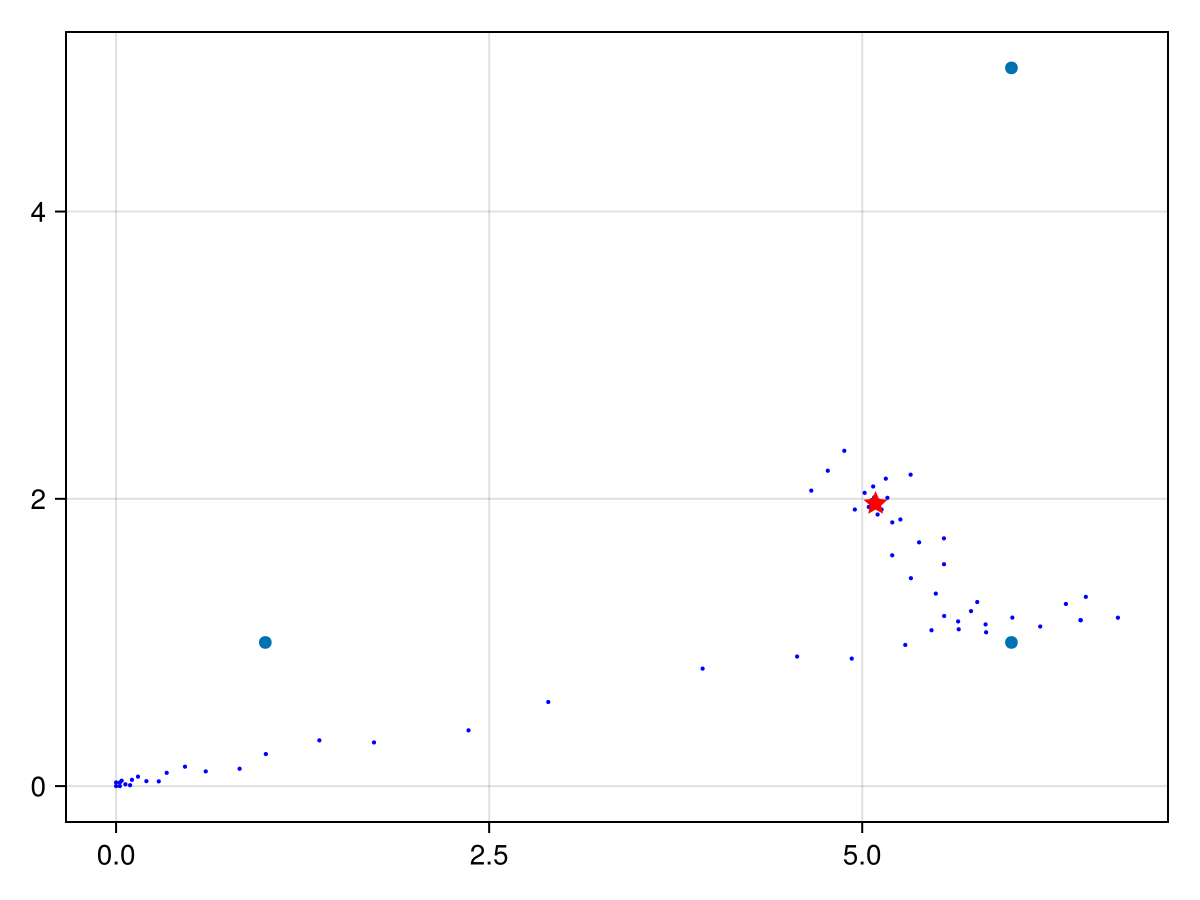

In [227]:
function fargplot(f, x)
    scatter!(x...; color = :blue, markersize = 3)
    return f(x)
end

scatter(unzip(pt)...)
x° = optimize(x -> fargplot(x -> sum(d2.([x], pt)), x), [0., 0.]).minimizer
scatter!(x°...; kwargs...)
dcf();

In [206]:
fun(a,b) = (println(a); b)
fun(2,3)

2


3

In [249]:
xrng = 0:0.1:7
yrng = 0:0.1:6
Z = [sum(d2.([(x, y)], pt)) for x in xrng, y in yrng]

71×61 Matrix{Float64}:
 15.3072  15.1591  15.0175  14.883   …  18.4676  18.6399  18.8147  18.992
 15.0632  14.9105  14.7641  14.6248     18.27    18.4436  18.6196  18.7982
 14.8239  14.6663  14.5149  14.3704     18.0749  18.2497  18.427   18.6068
 14.5899  14.4274  14.2707  14.1206     17.8825  18.0585  18.237   18.418
 14.3621  14.1946  14.0325  13.8765     17.6927  17.8698  18.0496  18.2318
 14.1412  13.9689  13.8013  13.6392  …  17.5055  17.6838  17.8647  18.0481
 13.9282  13.7511  13.5783  13.4103     17.3211  17.5005  17.6826  17.8671
 13.7238  13.5426  13.365   13.1914     17.1394  17.3199  17.5031  17.6888
 13.529   13.3442  13.1625  12.9842     16.9604  17.1421  17.3263  17.5132
 13.3442  13.1568  12.9722  12.7903     16.7843  16.967   17.1523  17.3402
 13.1701  12.9811  12.7947  12.611   …  16.611   16.7947  16.9811  17.1701
 13.0067  12.8172  12.6304  12.4466     16.4405  16.6252  16.8126  17.0027
 12.854   12.6649  12.4791  12.2967     16.2729  16.4586  16.647   16.8381
  ⋮ 

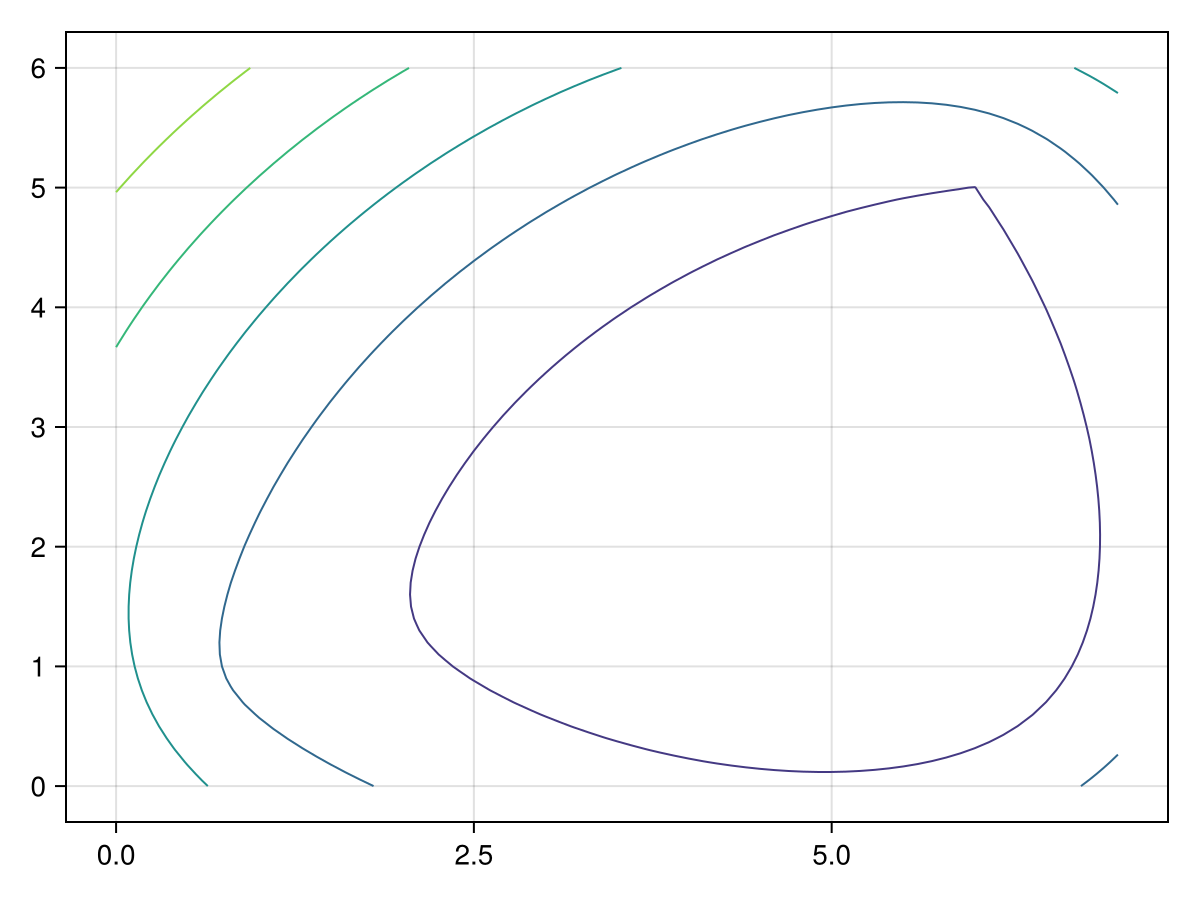

In [252]:
contour(xrng, yrng, Z)

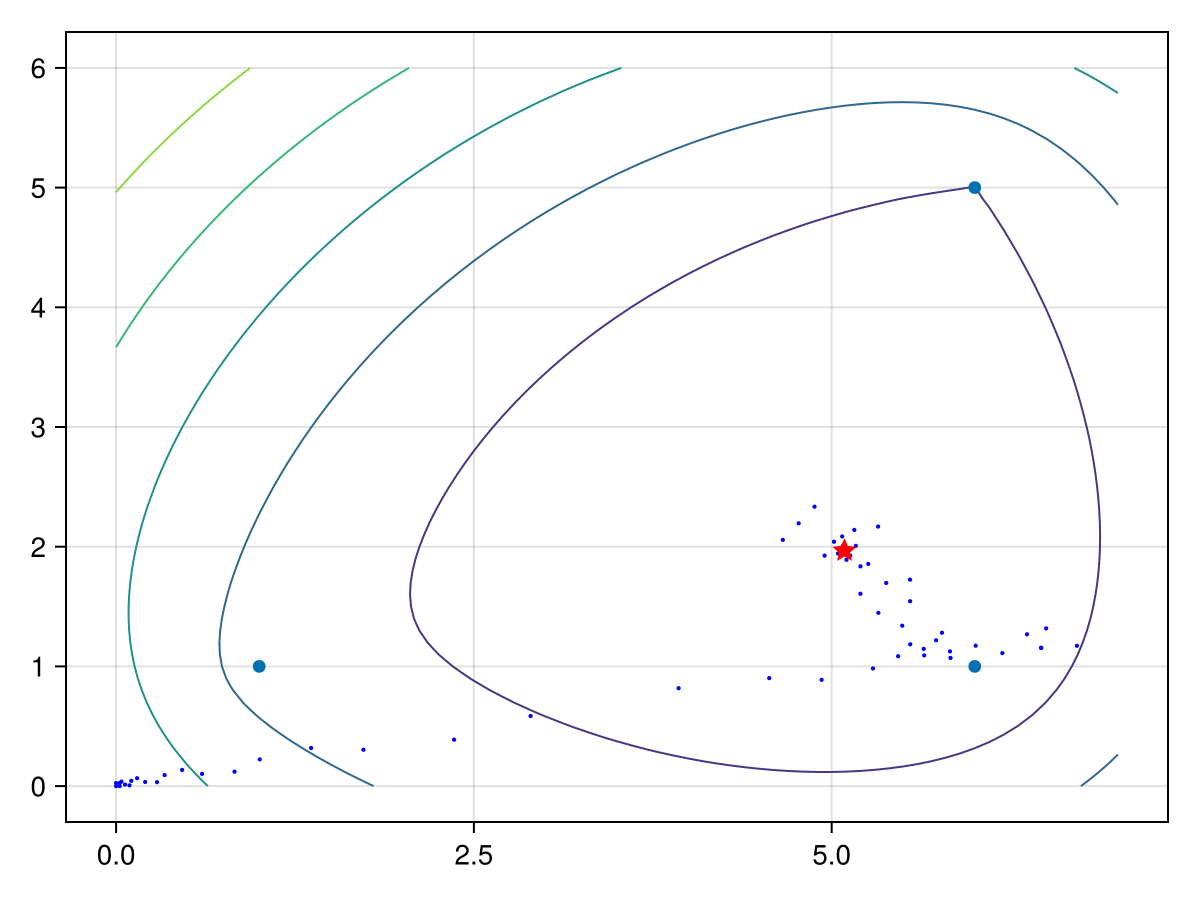

CairoMakie.Screen{IMAGE}


In [253]:
optimize(x -> fargplot(x -> sum(d2.([x], pt)), x), [0., 0.]);
scatter!(unzip(pt)...)
scatter!(x°...; kwargs...)
dcf();

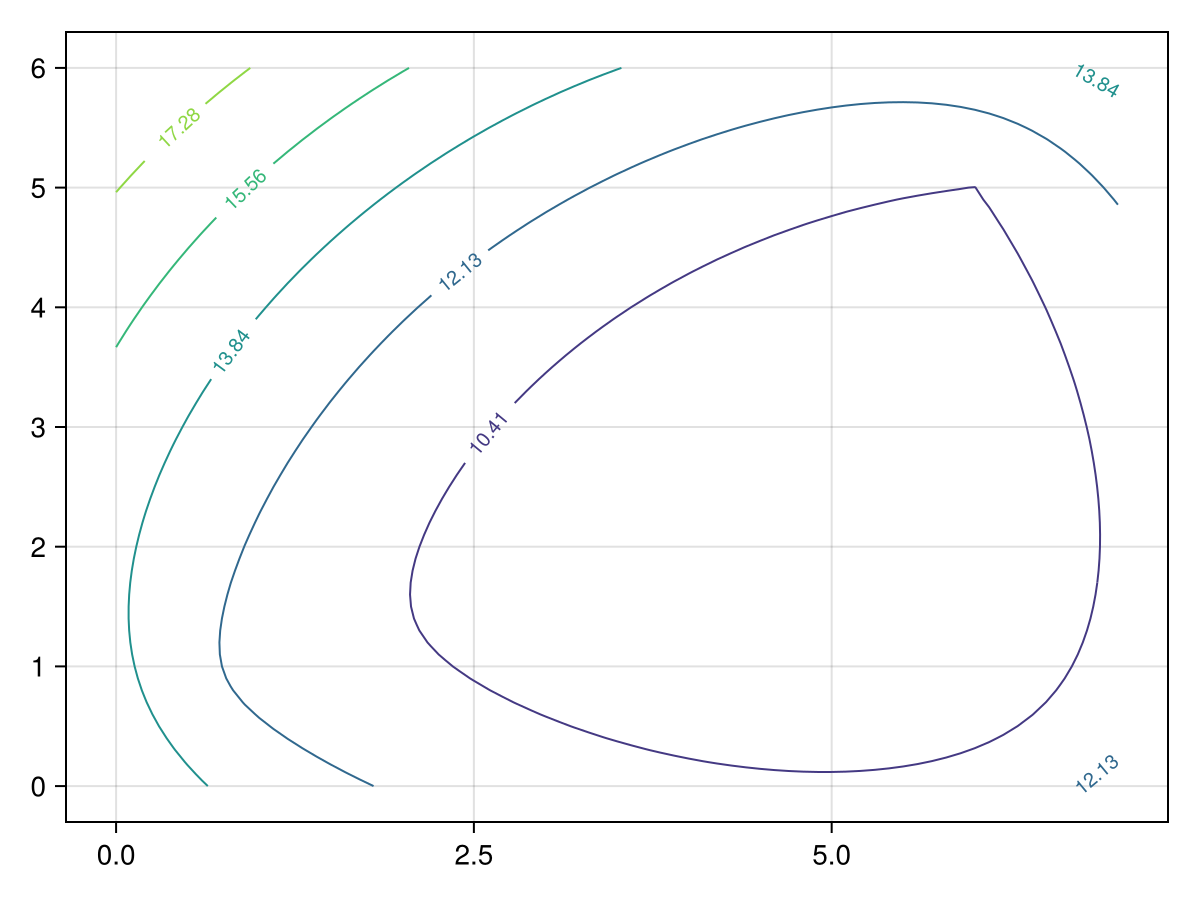

In [254]:
contour(xrng, yrng, Z; labels = true)

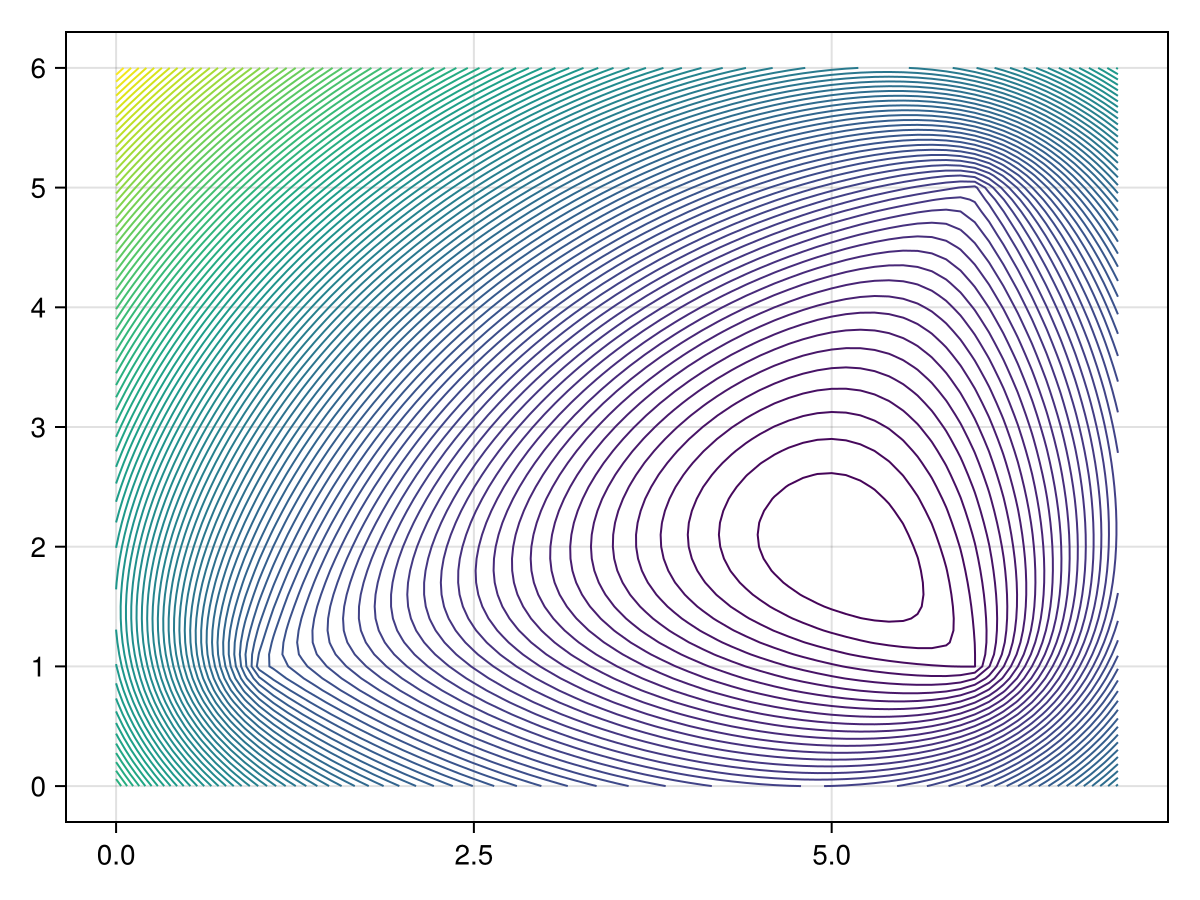

In [255]:
contour(xrng, yrng, Z; levels = 100)

In [4]:
r = [(1,2), (6,10)] 

2-element Vector{Tuple{Int64, Int64}}:
 (1, 2)
 (6, 10)

In [9]:
(width, height) = diff(first.(r)), diff(last.(r))

([5], [8])

In [16]:
r = [(1,2), (6,10)] 
unzip(x) = collect.(zip(x...))
[first(r)..., diff.(unzip(r))...]

4-element Vector{Any}:
 1
 2
  [5]
  [8]

In [18]:
result = [r[1]..., r[2][1] - r[1][1], r[2][2] - r[1][2]]

4-element Vector{Int64}:
 1
 2
 5
 8

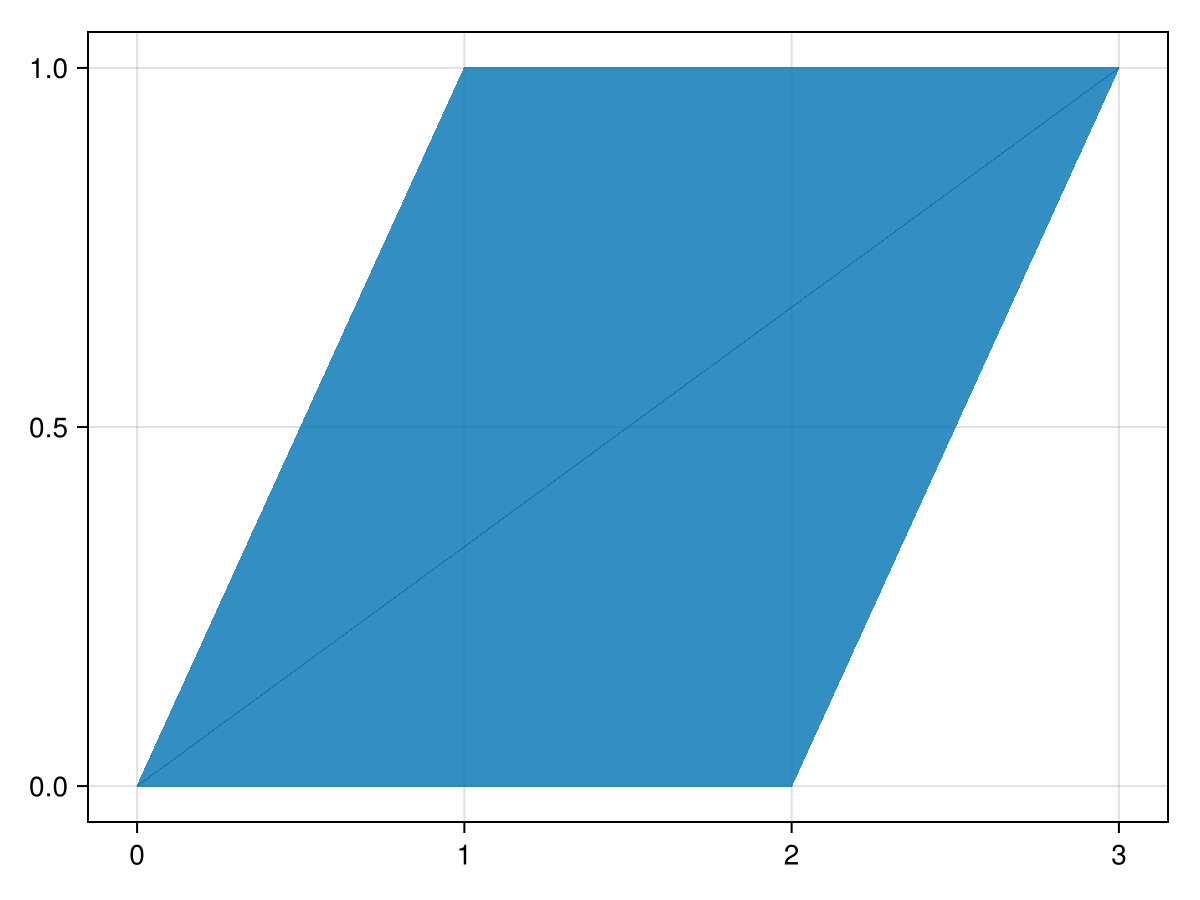

In [28]:
using CairoMakie
r  = [(0, 0), (2, 0), (3, 1), (1, 1)]
poly(r)

In [27]:
rect2poly(r) = [(r[1][1], r[1][2]), (r[2][1], r[1][2]), (r[2][1], r[2][2]), 
    (r[1][1], r[2][2])]
r = [(1,2), (6,10)]
rect2poly(r)

4-element Vector{Tuple{Int64, Int64}}:
 (1, 2)
 (6, 2)
 (6, 10)
 (1, 10)

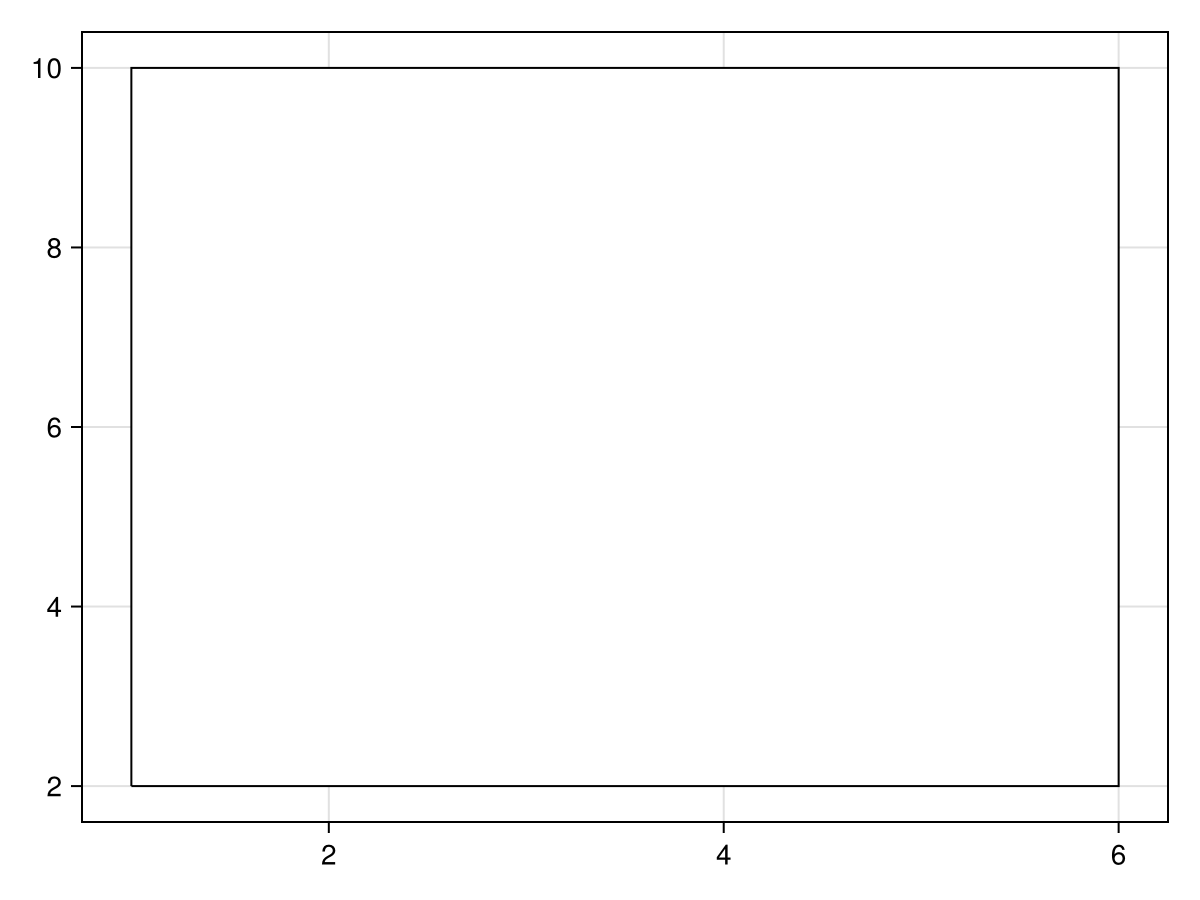

In [40]:
poly(rect2poly(r); color = :white, strokecolor = :black, strokewidth = 1)

In [61]:
r = [(1,2), (6,10)] 
(xmn, ymn), (xmx, ymx) = r
pt = [(xmn + rand()*(xmx - xmn), ymn + rand()*(ymx - ymn)) for _ in 1:20]

20-element Vector{Tuple{Float64, Float64}}:
 (2.715529925738282, 6.4430843705521745)
 (5.667596942510308, 8.884426299985705)
 (2.496432341709962, 4.143130678297261)
 (3.1595608188633095, 4.050075133974665)
 (2.4052974551791, 8.138726937904671)
 (4.808708157692964, 7.4842814453827415)
 (3.176399301807213, 7.998086427407763)
 (3.981315324047947, 3.2255945933599213)
 (1.7219830342415263, 5.020387803168648)
 (3.5840748163256007, 4.027762247604439)
 (4.637746751677512, 3.4844879575986445)
 (3.9505317246789877, 8.211269221981183)
 (1.3287064023866653, 5.002018799850643)
 (1.1018747032489464, 7.158941364952247)
 (3.2248462852997863, 7.826324553345312)
 (3.824173956037038, 2.7032116713366525)
 (5.286362415309429, 5.181761589928613)
 (5.169442658735097, 9.6741982099615)
 (2.1007476576190465, 4.191177387454841)
 (3.683270183972945, 7.252035045642221)

In [65]:
using Random
Random.seed!(2024)

r = [(1.0,2.0), (6.0,10.0)] 
(xmn, ymn), (xmx, ymx) = r
pt = [(rand(r[1][1]:r[2][1]), rand(r[1][2]:r[2][2])) for _ in 1:10]

10-element Vector{Tuple{Float64, Float64}}:
 (1.0, 8.0)
 (4.0, 10.0)
 (3.0, 7.0)
 (2.0, 10.0)
 (1.0, 4.0)
 (1.0, 8.0)
 (1.0, 3.0)
 (1.0, 6.0)
 (4.0, 7.0)
 (4.0, 4.0)

In [15]:
unzip(x) = collect.(zip(x...))
unzip(pt)[1]

20-element Vector{Float64}:
 1.515441308958069
 1.4901939475251738
 3.986738472105805
 1.8464972573925738
 5.787483451265421
 1.749376325435619
 3.196246141583516
 2.089143178157915
 2.4474047308221483
 3.9219156938514894
 3.4201737783447363
 1.9564898549708918
 2.6496244894744576
 3.4395871691711046
 1.2800506753783387
 2.827523074444314
 3.0777461848004632
 3.6834767821740035
 3.5475555395704608
 4.512010920454155

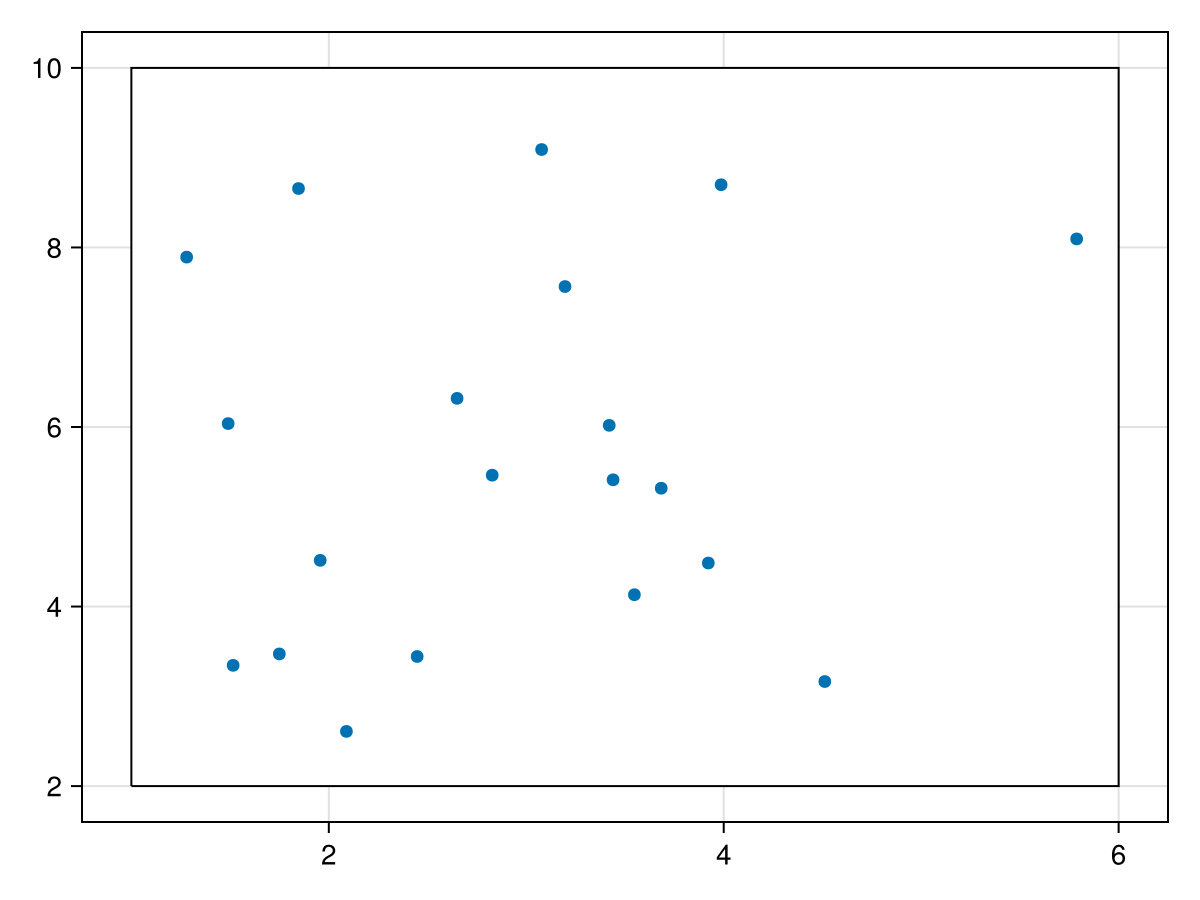

In [41]:
scatter!(unzip(pt)...)
dcf() = display(current_figure())
dcf();

In [42]:
pt

20-element Vector{Tuple{Float64, Float64}}:
 (1.515441308958069, 3.3448836346805972)
 (1.4901939475251738, 6.038172921048562)
 (3.986738472105805, 8.698672861991042)
 (1.8464972573925738, 8.656371439754196)
 (5.787483451265421, 8.095114483602016)
 (1.749376325435619, 3.472327538665273)
 (3.196246141583516, 7.564568206574318)
 (2.089143178157915, 2.6092515618809777)
 (2.4474047308221483, 3.4435175177198794)
 (3.9219156938514894, 4.484763054769165)
 (3.4201737783447363, 6.0184120449824094)
 (1.9564898549708918, 4.514606484741431)
 (2.6496244894744576, 6.3190652178540345)
 (3.4395871691711046, 5.411943422608092)
 (1.2800506753783387, 7.892319708291588)
 (2.827523074444314, 5.46326379382954)
 (3.0777461848004632, 9.090806429220073)
 (3.6834767821740035, 5.317877833904089)
 (3.5475555395704608, 4.131874025891201)
 (4.512010920454155, 3.164697908225559)

In [51]:
using Statistics
mean.(unzip(pt))

2-element Vector{Float64}:
 2.9212339487940326
 5.686625504511702

In [59]:
pi/4

0.7853981633974483

In [57]:
f(a,b) = (b = 5a; b)
f(1,2)

5

In [67]:
@doc sin

```
sin(x)
```

Compute sine of `x`, where `x` is in radians.

See also [`sind`](@ref), [`sinpi`](@ref), [`sincos`](@ref), [`cis`](@ref), [`asin`](@ref).

# Examples

```jldoctest
julia> round.(sin.(range(0, 2pi, length=9)'), digits=3)
1×9 Matrix{Float64}:
 0.0  0.707  1.0  0.707  0.0  -0.707  -1.0  -0.707  -0.0

julia> sind(45)
0.7071067811865476

julia> sinpi(1/4)
0.7071067811865475

julia> round.(sincos(pi/6), digits=3)
(0.5, 0.866)

julia> round(cis(pi/6), digits=3)
0.866 + 0.5im

julia> round(exp(im*pi/6), digits=3)
0.866 + 0.5im
```

```
sin(A::AbstractMatrix)
```

Compute the matrix sine of a square matrix `A`.

If `A` is symmetric or Hermitian, its eigendecomposition ([`eigen`](@ref)) is used to compute the sine. Otherwise, the sine is determined by calling [`exp`](@ref).

# Examples

```jldoctest
julia> sin(fill(1.0, (2,2)))
2×2 Matrix{Float64}:
 0.454649  0.454649
 0.454649  0.454649
```

```
sin(::BareInterval)
sin(::Interval)
```

Implement the `sin` function of the IEEE Standard 1788-2015 (Table 9.1).


In [87]:
function dgc(xy₁, xy₂; unit=:mi)
    length(xy₁) == length(xy₂) == 2 || error("Inputs must have length 2.")
    unit in [:mi, :km] || error("Unit must be :mi or :km")

    Δx, Δy = xy₂[1] - xy₁[1], xy₂[2] - xy₁[2]
    a = sind(Δy / 2)^2 + cosd(xy₁[2]) * cosd(xy₂[2]) * sind(Δx / 2)^2
    2 * asin(min(sqrt(a), 1.0)) * (unit == :mi ? 3958.75 : 6371.00)
end
pt1 = (-78.6414, 35.8302)
pt2 = (-82.3459, 29.6788)
dgc(pt1, pt2)

476.31236367257304

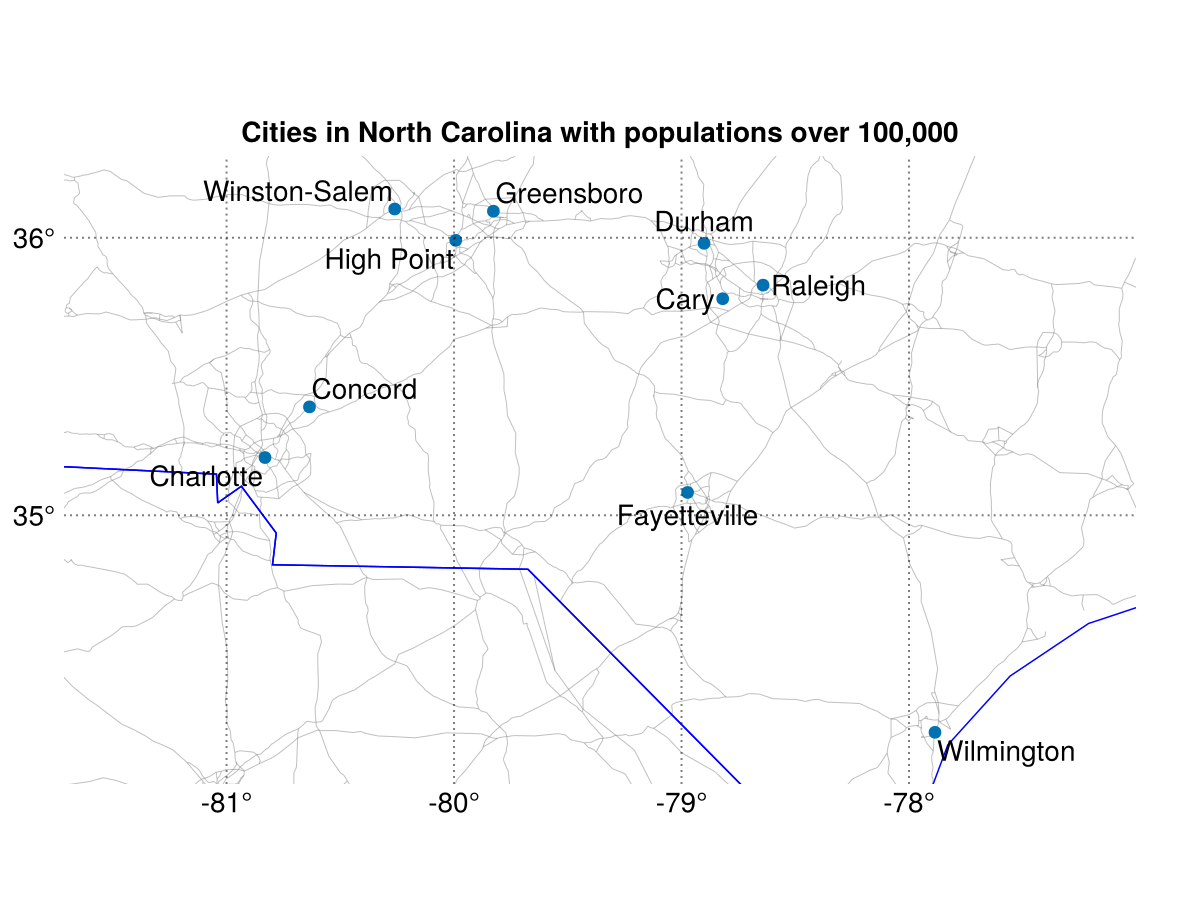

In [2]:
using Logjam.DataTools, Logjam.MapTools
using GeoMakie, DataFrames

# Filter U.S. place data for cities in North Carolina with populations over 100,000
df = filter(r -> (r.STFIP == st2fips(:NC)) && (r.POP > 100_000), usplace())

# Extract longitude, latitude, and city names from dataframe
x, y, name = df.LON, df.LAT, df.NAME

# Create and title a map figure and axis
fig, ax = makemap(x, y)
ax.title = "Cities in North Carolina with populations over 100,000"

# Plot cities as scatter points
scatter!(ax, x, y)

# Annotate the scatter plot with city names
text!(ax, x, y, text=name; aligntext(x, y)...)

# Display the map
display(fig);

In [4]:
@doc makemap

```
makemap(x::Union{Nothing, AbstractVector{<:Real}, Tuple{Vararg{<:Real, 2}}} = nothing,
        y::Union{Nothing, AbstractVector{<:Real}, Tuple{Vararg{<:Real, 2}}} = nothing;
        region::Symbol = :World, backend::Symbol = :CairoMakie,
        xexpand::Real = 0.3, yexpand::Real = 0.1, doRoadbkgd::Bool = true, maxroadlatspan::Real = 2.5) -> Figure, GeoAxis, Vector, Tuple
```

Creates map visualization for predefined or user-defined region of interest. 

The map can focus on different predefined regions (the world, U.S., or continental U.S.) or a user-defined region of interest that contains a set of longitude-latitude points. Provides Mercator projection of geographical features such as country borders, U.S. state borders, and roads using `GeoMakie`.

# Arguments

  * `x`: Optional set of at least two longitudes to define the region of interest; if `nothing`, defaults to a pre-defined region based on the `region` parameter.
  * `y`: Optional set of at least two latitudes to define the region of interest; if `nothing`, defaults to a pre-defined region based on the `region` parameter.
  * `region::Symbol`: Specifies the region to focus on. Options include:

      * `:World`: Default. Focuses on the entire world.
      * `:US`: Focuses on the United States.
      * `:CUS`: Focuses on the continental U.S. without showing country borders.
  * `backend::Symbol`: Specifies the rendering backend. Options are:

      * `:CairoMakie`: Default. Uses CairoMakie for rendering.
      * `:GLMakie`: Uses GLMakie for rendering.
  * `xexpand::Float64`: Expansion factor for the x-axis limits. Default is `0.3`.
  * `yexpand::Float64`: Expansion factor for the y-axis limits. Default is `0.1`.
  * `doRoadbkgd::Bool`: Whether to include roads as background features if maximum latitude span is less than `maxroadlatspan`. Default is `true`.
  * `maxroadlatspan::Float64`: Maximum latitude span for displaying roads. Default is `2.5`°.

# Returns

  * `fig::Figure`: The figure object containing the map.
  * `ax::GeoAxis`: The axis object where the map is drawn.
  * `hborders::Vector`: A vector of handles for the lines plotted on the map in the following order:

      * `hborders[1]`: NHS roads, if used (derived from: https://geodata.bts.gov/datasets/usdot::national-highway-system-nhs/explore).
      * `hborders[2]`: U.S. state borders, if used (derived from: https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json)).
      * `hborders[3]`: Country borders, if used (derived from https://github.com/PublicaMundi/MappingAPI/blob/master/data/geojson/countries.geojson?short_path=b27f2ec)).
  * `limits::Tuple`: The geographic limits (bounding box) used for the map.

# Behavior

  * Automatically selects the appropriate region and borders based on the provided `x`, `y`, and `region` parameters.
  * Chooses the rendering backend and activates it accordingly.
  * Draws country borders, U.S. state borders, and National Highway System (NHS) roads depending on the specified options and region.
  * If `x` and `y` are provided, calculates the bounding box with optional expansion and adjusts the map view accordingly. Expansion allows for better visualization around `x` and `y` points.

# Examples

```julia-repl
# Create a world map using CairoMakie
fig, ax = makemap()
display(fig)

# Create a U.S. map with GLMakie backend
fig, ax, hborders = makemap(region=:US, backend=:GLMakie)
display(fig)

# Create a map focused on a specific region with expanded limits
using GeoMakie   # Required for scatter! function
x = [-84.0, -83.0, -82.0]
y = [41.0, 42.0, 43.0]
fig, ax, hborders, limits = makemap(x, y)
scatter!(ax, x, y, markersize=12, color=:red)
println(limits)
display(fig)
```


# ALA

In [2]:
function dgc(xy₁, xy₂; unit=:mi)
    length(xy₁) == length(xy₂) == 2 || error("Inputs must have length 2.")
    unit in [:mi, :km] || error("Unit must be :mi or :km")

    Δx, Δy = xy₂[1] - xy₁[1], xy₂[2] - xy₁[2]
    a = sind(Δy / 2)^2 + cosd(xy₁[2]) * cosd(xy₂[2]) * sind(Δx / 2)^2
    2 * asin(min(sqrt(a), 1.0)) * (unit == :mi ? 3958.75 : 6371.00)
end

dgc (generic function with 1 method)

In [2]:
using Logjam.DataTools, DataFrames

df = filter(r -> (r.STFIP == st2fips(:NC)) && (r.POP > 100_000), usplace())
select!(df, :NAME, :LAT, :LON, :POP)

10×4 DataFrame
 Row │ NAME           LAT      LON       POP    
     │ String         Float64  Float64   Int64  
─────┼──────────────────────────────────────────
   1 │ Cary           35.7814  -78.819   174721
   2 │ Charlotte      35.209   -80.831   874579
   3 │ Concord        35.3921  -80.6355  105240
   4 │ Durham         35.98    -78.901   283506
   5 │ Fayetteville   35.0828  -78.9735  208501
   6 │ Greensboro     36.0951  -79.827   299035
   7 │ High Point     35.9908  -79.9927  114059
   8 │ Raleigh        35.8302  -78.6415  467665
   9 │ Wilmington     34.2092  -77.8858  115451
  10 │ Winston-Salem  36.1029  -80.2608  249545

In [9]:
P = permutedims(hcat(df.LON, df.LAT))
P

2×10 Matrix{Float64}:
 -78.819   -80.831  -80.6355  -78.901  …  -78.6415  -77.8858  -80.2608
  35.7814   35.209   35.3921   35.98       35.8302   34.2092   36.1029

In [117]:
# P = collect(zip(df.LON, df.LAT))

10-element Vector{Tuple{Float64, Float64}}:
 (-78.819011, 35.78145)
 (-80.83099, 35.209045)
 (-80.63551, 35.392094)
 (-78.900976, 35.98005)
 (-78.973515, 35.082766)
 (-79.826996, 36.095148)
 (-79.992713, 35.990803)
 (-78.641493, 35.830204)
 (-77.885767, 34.209225)
 (-80.260829, 36.102863)

In [123]:
K = [i for i in eachrow(P)]

10-element Vector{SubArray{Tuple{Float64, Float64}, 1, Matrix{Tuple{Float64, Float64}}, Tuple{Int64, Base.Slice{Base.OneTo{Int64}}}, true}}:
 [(-78.819011, 35.78145)]
 [(-80.83099, 35.209045)]
 [(-80.63551, 35.392094)]
 [(-78.900976, 35.98005)]
 [(-78.973515, 35.082766)]
 [(-79.826996, 36.095148)]
 [(-79.992713, 35.990803)]
 [(-78.641493, 35.830204)]
 [(-77.885767, 34.209225)]
 [(-80.260829, 36.102863)]

In [14]:
d2(x1, x2) = length(x1) == length(x2) ? sqrt(sum((x1 .- x2).^2)) : 
    error("Inputs not same length.")

P = [1 1; 6 1; 6 5]
P = [1 6 6]'
D2(X₁, X₂) = [d2(i, j) for i in eachrow(X₁), j in eachrow(X₂)]
D2(P, P)

3×3 Matrix{Float64}:
 0.0  5.0  5.0
 5.0  0.0  0.0
 5.0  0.0  0.0

In [74]:
vcat([collect(x)' for x in X]...)

3×2 Matrix{Float64}:
 -78.819   35.7814
 -80.831   35.209
 -80.6355  35.3921

In [97]:
tup2mat(pt) = hcat([collect(p) for p in pt]...)
X2 = tup2mat(X)

2×3 Matrix{Float64}:
 -78.819   -80.831  -80.6355
  35.7814   35.209   35.3921

In [103]:
collect(eachcol(X))

1-element Vector{SubArray{Tuple{Float64, Float64}, 1, Matrix{Tuple{Float64, Float64}}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}}:
 [(-78.819011, 35.78145), (-80.83099, 35.209045), (-80.63551, 35.392094)]

In [98]:
for i in eachcol(X2)
    println(i)
end

[-78.819011, 35.78145]
[-80.83099, 35.209045]
[-80.63551, 35.392094]


In [139]:
Dgc(X₁, X₂) = [dgc(i, j) for i in eachrow(X₁), j in eachrow(X₂)]
w = collect(10:-1:1)
D = Dgc(X, P)

3×10 Matrix{Float64}:
   0.0    119.888   105.551   …  67.2747   10.5021  120.79   83.6538
 119.888    0.0      16.7769     71.661   130.39    180.976  69.5588
 105.551   16.7769    0.0        54.8842  116.024   176.109  53.4149

In [108]:
m,n = size(D)

(3, 10)

In [109]:
using SparseArrays

α = [argmin(c) for c in eachcol(D)]

10-element Vector{Int64}:
 1
 2
 3
 1
 1
 1
 3
 1
 1
 3

In [110]:
W = sparse(α, 1:n, w, m, n)

3×10 SparseMatrixCSC{Int64, Int64} with 10 stored entries:
 10  ⋅  ⋅  7  6  5  ⋅  3  2  ⋅
  ⋅  9  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
  ⋅  ⋅  8  ⋅  ⋅  ⋅  4  ⋅  ⋅  1

In [39]:
sum(W .* D)

1243.678789898914

In [138]:
function TC(X)
    D = Dgc(X, P)
    α = [argmin(c) for c in eachcol(D)]
    m, n = size(D)
    return sum(sparse(α, 1:n, w, m, n) .* D)
end

TC (generic function with 1 method)

-80.83099

In [79]:
using Random

Random.seed!(2024)

n = 3
(xmn, xmx), (ymn, ymx) = extrema(P[:, 1]), extrema(P[:, 2])
X0 = rand(size(P, 2)
X0 = [(xmn + rand()*(xmx - xmn), ymn + rand()*(ymx - ymn)) for _ in 1:3]

3-element Vector{Tuple{Float64, Float64}}:
 (-80.51042468520335, 35.57056734748422)
 (-79.11490804842825, 35.97231236540615)
 (-79.84730753361495, 35.39837631689788)

In [134]:
(xmn, xmx), (ymn, ymx) = extrema(P, dims=1)

1×2 Matrix{Tuple{Float64, Float64}}:
 (-80.831, -77.8858)  (34.2092, 36.1029)

In [135]:
xmn

-80.83099

In [130]:
diff(extrema(P, dims=1))

LoadError: UndefKeywordError: keyword argument `dims` not assigned

In [142]:
using Random

Random.seed!(2024)
n = 3
(xmn, xmx), (ymn, ymx) = extrema(P, dims=1)
X₀ = [xmn ymn] .+ rand(n, 2) .* [(xmx - xmn) (ymx - ymn)]

3×2 Matrix{Float64}:
 -80.5104  35.9723
 -78.7137  34.8417
 -79.1149  35.3984

In [143]:
using Optim, Statistics

X° = optimize(TC, X₀).minimizer

3×2 Matrix{Float64}:
 -79.827  36.0951
 -80.831  35.209
 -78.819  35.7815

In [1]:
collect((2,3))

2-element Vector{Int64}:
 2
 3

In [ ]:

α = [argmin(c) for c in eachcol(D)]
W = sparse(α, 1:m, w, n, m)
TD = sum(W .* D)


In [22]:
 a = [3, 2, 2, 1, 2, 2, 1, 1, 3, 4, 1]
k = [count(x -> x == v, a) for v in unique(a)]

4-element Vector{Int64}:
 2
 4
 4
 1

In [24]:
any(k .== 4)

true

In [25]:
W = [0 1 1 0 1; 2 0 0 2 0]
count(!iszero, row)

2×5 Matrix{Int64}:
 0  1  1  0  1
 2  0  0  2  0

In [28]:
a = [3, 2, 2, 1, 2, 2, 1, 1, 3, 4, 1]
a[1:5] .= 5
a

11-element Vector{Int64}:
 5
 5
 5
 5
 5
 2
 1
 1
 3
 4
 1

## UFL Heuristics

In [3]:
d1(x1, x2) = length(x1) == length(x2) ? sum(abs.(x1 .- x2)) : 
    error("Inputs not same length.")
D1(X₁, X₂) = [d1(i, j) for i in eachrow(X₁), j in eachrow(X₂)]

D1 (generic function with 1 method)

In [4]:
P = [50 150 220 295 420]'
r, f = 1, 1
w = r * f
k = [150 200 150 150 200]
C = w * D1(P, P)

5×5 Matrix{Int64}:
   0  100  170  245  370
 100    0   70  145  270
 170   70    0   75  200
 245  145   75    0  125
 370  270  200  125    0

In [5]:
k = [150 200 150 150 200]
z = collect(1:5)
y = []
k[setdiff(z, 3)]

4-element Vector{Int64}:
 150
 200
 150
 200

In [6]:
setdiff(1:5, 3)

4-element Vector{Int64}:
 1
 2
 4
 5

In [7]:
N = collect(1:size(C,1))
y = []

Any[]

In [8]:
minimum(C[3, :])

0

In [9]:
setdiff(N, y)

5-element Vector{Any}:
 1
 2
 3
 4
 5

In [10]:
for i in setdiff(N, y)
    yi = vcat(y, i)
    TCi = sum(k[yi]) + sum(minimum(C[yi, :], dims=1))
    println(i, " : ", TCi)
end  

1 : 1035
2 : 785
3 : 665
4 : 740
5 : 1165


In [11]:
y = vcat(y, 3)
setdiff(N, y)

4-element Vector{Any}:
 1
 2
 4
 5

In [12]:
for i in setdiff(N, y)
    yi = vcat(y, i)
    TCi = sum(k[yi]) + sum(minimum(C[yi, :], dims=1))
    println(i, " : ", TCi)
end

1 : 645
2 : 725
4 : 665
5 : 665


In [13]:
y = vcat(y, 1)
setdiff(N, y)

3-element Vector{Any}:
 2
 4
 5

In [14]:
for i in setdiff(N, y)
    yi = vcat(y, i)
    TCi = sum(k[yi]) + sum(minimum(C[yi, :], dims=1))
    println(i, " : ", TCi)
end

2 : 775
4 : 645
5 : 645


In [15]:
# Version in slides

function ufladd(k, C)
    fTC(y) = sum(k[y]) + sum(minimum(C[y, :], dims=1))
    y = Int[]
    TCᵒ, done = Inf, false
    while !done
        TC, i = Inf, nothing               # Stops if y = all NF
        for i′ = setdiff(1:size(C, 1), y)  # since i′ = []
            TC′ = fTC(vcat(y, i′))
            if TC′ < TC
                TC, i = TC′, i′
            end
        end
        if TC < TCᵒ                     # TC = Inf if y = all NF
            TCᵒ, y = TC, push!(y, i)
        else
            done = true
        end
    end
    return y, TCᵒ
end

ufladd(k, C, [1, 4, 3])
ufladd(k, C)

([3, 1], 645)

In [37]:
function ufladd(k, C, y = Int[]; p::Union{Int, Nothing} = nothing)
    if k isa Number
        k = fill(k, size(C, 1))
    end
    fTC(y) = sum(k[y]) + sum(minimum(C[y, :], dims=1))
    TCᵒ = isempty(y) ? Inf : fTC(y)
    N = 1:size(C, 1) 
    done = false
    while !done
        TC, i = Inf, nothing
        for i′ = setdiff(N, y)
            TC′ = fTC(vcat(y, i′))
            if TC′ < TC
                TC, i = TC′, i′
            end
        end
        if (p === nothing && TC < TCᵒ) || (p isa Int && length(y) < p)
            TCᵒ, y = TC, push!(y, i)
        else
            done = true
        end
    end
    return y, TCᵒ
end

ufladd(k, C, [1:5;])

([1, 2, 3, 4, 5], 850)

In [53]:
function ufldrop(k, C, y = nothing; p::Union{Int, Nothing} = nothing)
    if k isa Number
        k = fill(k, size(C, 1))
    end
    fTC(y) = sum(k[y]) + sum(minimum(C[y, :], dims=1))
    if y === nothing
        y = 1:size(C, 1)
    end
    TCᵒ = fTC(y)
    done = false
    while !done
        TC, i = Inf, nothing
        for i′ in y
            TC′ = fTC(setdiff(y, i′))
            if TC′ < TC
                TC, i = TC′, i′
            end
        end
        if (p === nothing && TC < TCᵒ) || (p isa Int && length(y) > p)
            TCᵒ, y = TC, setdiff(y, i)
            if length(y) == 1
                done = true
            end
        else
            done = true
        end
    end
    return y, TCᵒ
end

ufldrop(k, C)
ufldrop(k, C, [1:2;])

([2], 785)

In [18]:
function uflxchg0(k, C, y)
    if k isa Number
        k = fill(k, size(C, 1))
    end
    fTC(y) = sum(k[y]) + sum(minimum(C[y, :], dims=1))
    N = 1:size(C, 1)
    TCᵒ = fTC(y)
    done = false
    while length(y) > 1 && !done           # Can't exchange if only one NF
        TC, i, j = Inf, nothing, nothing
        for i′ in  y
            for j′ in setdiff(N, y)
                TC′ = fTC([setdiff(y, i′)..., j′])  # Swap i' in y with j'
                if TC′ < TC
                    TC, i, j = TC′, i′, j′
                end
            end
        end
        if TC < TCᵒ
            TCᵒ, y = TC, [setdiff(y, i)..., j]
        else
            done = true
        end
    end
    return y, TCᵒ
end

y = ufladd(k,C)[1]
uflxchg(k, C, y)

LoadError: UndefVarError: `uflxchg` not defined

In [19]:
# Swap function: Remove i from y and add j to y
function swap!(y::Vector{Int}, i::Int, j::Int)
    deleteat!(y, findfirst(==(i), y))  # Remove i from y
    push!(y, j)  # Add j to y
end

# Revert function: Reverse the swap, remove j from y, and add i back
function revert!(y::Vector{Int}, i::Int, j::Int)
    deleteat!(y, findfirst(==(j), y))  # Remove j from y
    push!(y, i)  # Add i back to y
end

function uflxchg(k, C, y::Vector{Int})
    if k isa Number
        k = fill(k, size(C, 1))
    end
    fTC(y) = sum(k[y]) + sum(minimum(C[y, :], dims=1))
    N = 1:size(C, 1)
    TCᵒ = fTC(y)
    done = false
    while length(y) > 1 && !done     # No exchange if 1 NF
        TC, i, j = Inf, nothing, nothing
        for i′ in  y
            for j′ in setdiff(N, y)
                swap!(y, i′, j′)     # Swap i' in y with j'
                TC′ = fTC(y)  
                if TC′ < TC
                    TC, i, j = TC′, i′, j′
                end
                revert!(y, i′, j′)   # Restore original y
            end
        end
        if TC < TCᵒ
            TCᵒ = TC
            swap!(y, i, j)
        else
            done = true
        end
    end
    return y, TCᵒ
end

y = ufladd(k,C)[1]
uflxchg(k, C, y)

([4, 1], 600)

In [20]:
# Slide version

function ufl(k, C)
    y′, TC′ = ufladd(k, C)
    y, TC = y′, TC′
    done = false
    while !done
        y, TC = uflxchg(k, C, y′)
        if Set(y) !== Set(y′)
            y′, TC′ = ufladd(k, C, y)
            y′′, TC′′ = ufldrop(k, C, y)
            if TC′′ < TC′
                y′, TC′ = y′′, TC′′
            end
            if TC′ >= TC
                done = true
            end
        else
            done = true
        end
    end
    return y, TC
end

ufl(k, C)

LoadError: UndefVarError: `ufl` not defined

In [21]:
function ufl(k, C, dodisp = true)
    y′, TC′ = ufladd(k, C)
    dodisp ? println("  Add: ", TC′) : nothing
    y, TC = y′, TC′
    done = false
    while !done
        y, TC = uflxchg(k, C, y′)
        dodisp ? println(" Xchg: ", TC) : nothing
        if Set(y) !== Set(y′)
            y′, TC′ = ufladd(k, C, y)
            dodisp ? println("  Add: ", TC′) : nothing
            y′′, TC′′ = ufldrop(k, C, y)
            dodisp ? println(" Drop: ", TC′′) : nothing
            if TC′′ < TC′
                y′, TC′ = y′′, TC′′
            end
            if TC′ >= TC
                done = true
            end
        else
            done = true
        end
    end
    return y, TC
end

ufl(k, C)

  Add: 645
 Xchg: 600
  Add: 600
 Drop: 600


([4, 1], 600)

In [54]:
function pmedian(p, C)
    y = ufladd(0, C, p = p)[1]
    y, TC = uflxchg(0, C, y)
    y′ = ufldrop(0, C, p = p)[1]
    y′, TC′ = uflxchg(0, C, y′)
    if TC′ < TC
        y, TC = y′, TC′
    end
    return y, TC
end

pmedian(3, C)

([5, 3, 1], 145)

In [26]:
p = 3
y = ufladd(0, C, p = p)[1]
y, TC = uflxchg(0, C, y)
y′ = ufldrop(0, C, p = p)

LoadError: MethodError: no method matching uflxchg(::Int64, ::Matrix{Int64}, ::Tuple{Vector{Int64}, Int64})

[0mClosest candidates are:
[0m  uflxchg(::Any, ::Any, [91m::Vector{Int64}[39m)
[0m[90m   @[39m [35mMain[39m [90m[4mIn[19]:13[24m[39m


## DataFrames

In [1]:
using Logjam.DataTools, DataFrames

df = uscsa()

180×7 DataFrame
 Row │ CSA    NAME                               LAT      LON        POP       ⋯
     │ Int64  String?                            Float64  Float64    Int64     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   101  Abilene-Sweetwater, TX             32.4453   -99.7981    191317  ⋯
   2 │   104  Albany-Schenectady, NY             42.8411   -73.8302   1190727
   3 │   105  Albuquerque-Santa Fe-Los Alamos,…  35.2446  -106.485    1162523
   4 │   106  Allentown-Bethlehem-East Strouds…  40.7388   -75.3789   1030216
   5 │   107  Altoona-Huntingdon, PA             40.4717   -78.2778    166914  ⋯
   6 │   108  Amarillo-Borger, TX                35.2075  -101.827     289308
   7 │   118  Appleton-Oshkosh-Neenah, WI        44.2032   -88.4417    414877
   8 │   120  Asheville-Waynesville-Brevard, NC  35.5067   -82.5978    502001
   9 │   122  Atlanta--Athens-Clarke County--S…  33.8526   -84.3149   6976171  ⋯
  10 │   132  Baton Rouge-Hammond, LA            30.4545   -90.9729   1003726
  11 │   142  Birmingham-Cullman-Talladega, AL   33.5239   -86.7406   1361033
  ⋮  │   ⋮                    ⋮                     ⋮         ⋮         ⋮      ⋱
 171 │   540  Tyler-Jacksonville, TX             32.2529   -95.2859    283891
 172 │   542  Union City-Martin, TN              36.3431   -88.9217     63689  ⋯
 173 │   544  Victoria-Port Lavaca, TX           28.7782   -96.9513    118437
 174 │   545  Virginia Beach-Chesapeake, VA-NC   36.8807   -76.3118   1857542
 175 │   548  Washington-Baltimore-Arlington, …  39.0344   -77.0679  10028331
 176 │   554  Wausau-Stevens Point-Wisconsin R…  44.6928   -89.7295    282597  ⋯
 177 │   555  Weatherford-Elk City, OK           35.4389   -99.116      61847
 178 │   556  Wichita-Arkansas City-Winfield, …  37.665    -97.2967    682159
 179 │   558  Williamsport-Lock Haven, PA        41.2223   -77.0969    151638
 180 │   566  Youngstown-Warren-Salem, OH        41.0699   -80.7273    532468  ⋯
                                                  2 columns and 159 rows omitted

In [22]:
df = filter(r -> startswith(r[:NAME], "Ral"), uscsa())

1×7 DataFrame
 Row │ CSA    NAME                     LAT      LON       POP      ALAND    AW ⋯
     │ Int64  String?                  Float64  Float64   Int64    Float64  Fl ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   450  Raleigh-Durham-Cary, NC  35.8042  -78.7465  2242324   4978.9  10 ⋯
                                                                1 column omitted

In [7]:
df.CSA

1-element Vector{Int64}:
 450

In [25]:
df = filter(r -> !ismissing(r[:CSA]) && r[:CSA] in df.CSA, uscbsa())

5×10 DataFrame
 Row │ CBSA   NAME                    LAT      LON       POP      ALAND     AW ⋯
     │ Int64  String                  Float64  Float64   Int64    Float64   Fl ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 20500  Durham-Chapel Hill, NC  35.9804  -78.9917   588911  1758.1     5 ⋯
   2 │ 39580  Raleigh-Cary, NC        35.7731  -78.6243  1413982  2118.41    2
   3 │ 11360  Anderson Creek, NC      35.3541  -78.8674   133568   594.933
   4 │ 41820  Sanford, NC             35.4538  -79.1736    63285   255.062
   5 │ 25780  Henderson, NC           36.3328  -78.403     42578   252.396   1 ⋯
                                                               4 columns omitted

In [15]:
df.CBSA

5-element Vector{Int64}:
 20500
 39580
 11360
 41820
 25780

In [27]:
df = filter(r -> !ismissing(r[:CBSA]) && r[:CBSA] in df.CBSA, uscounty())

10×10 DataFrame
 Row │ STFIP  COFIP  NAME      ST       LAT      LON       POP      ALAND    A ⋯
     │ Int64  Int64  String31  String3  Float64  Float64   Int64    Float64  F ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    37     37  Chatham   NC       35.756   -79.2084    76285  681.679    ⋯
   2 │    37     63  Durham    NC       35.9862  -78.9017   324833  286.525
   3 │    37     69  Franklin  NC       36.0442  -78.354     68573  491.802
   4 │    37     85  Harnett   NC       35.3541  -78.8674   133568  594.933
   5 │    37    101  Johnston  NC       35.5706  -78.4191   215999  792.017    ⋯
   6 │    37    105  Lee       NC       35.4538  -79.1736    63285  255.062
   7 │    37    135  Orange    NC       35.9801  -79.0823   148696  397.559
   8 │    37    145  Person    NC       36.372   -78.9704    39097  392.34
   9 │    37    181  Vance     NC       36.3328  -78.403     42578  252.396    ⋯
  10 │    37    183  Wake      NC       35.7953  -78.68    1129410  834.587
                                                               2 columns omitted

In [87]:
df = filter(r -> r[:STFIP] in df.STFIP && r[:COFIP] in df.COFIP, uscentract())

491×10 DataFrame
 Row │ STFIP  COFIP  TRFIP   ST       LAT      LON       POP    ALAND    AWATE ⋯
     │ Int64  Int64  Int64   String3  Float64  Float64   Int64  Float64  Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    37     37   20103  NC       35.8423  -79.0516   5520   10.992    0.0 ⋯
   2 │    37     37   20104  NC       35.7866  -79.0695   6082   15.811    0.3
   3 │    37     37   20105  NC       35.831   -79.1109   7944    8.748    0.0
   4 │    37     37   20107  NC       35.8447  -79.1709   2643   19.508    0.2
   5 │    37     37   20108  NC       35.8029  -79.1364   1949   10.88     0.2 ⋯
   6 │    37     37   20201  NC       35.7996  -79.454    3007   59.115    0.4
   7 │    37     37   20202  NC       35.7977  -79.2612   3382   47.904    0.3
   8 │    37     37   20203  NC       35.7311  -79.3019   2409   52.516    0.1
   9 │    37     37   20300  NC       35.6923  -79.4761   2742   55.849    0.2 ⋯
  10 │    37     37   20401  NC       35.7218  -79.4603   5835    7.059    0.0
  11 │    37     37   20402  NC       35.7378  -79.4674   4610   10.211    0.1
  ⋮  │   ⋮      ⋮      ⋮        ⋮        ⋮        ⋮        ⋮       ⋮        ⋮  ⋱
 482 │    37    183   54304  NC       35.86    -78.3206   5628   15.01     0.0
 483 │    37    183   54305  NC       35.831   -78.3178   3551    4.759    0.0 ⋯
 484 │    37    183   54306  NC       35.8137  -78.3207   3635   10.872    0.0
 485 │    37    183   54402  NC       35.769   -78.394    8201   15.676    0.0
 486 │    37    183   54403  NC       35.8356  -78.4153   4159   12.991    0.1
 487 │    37    183   54404  NC       35.7991  -78.3756   6927   11.245    0.0 ⋯
 488 │    37    183   54501  NC       35.7417  -78.6602   5763    1.411    0.0
 489 │    37    183   54502  NC       35.7528  -78.6486   3898    3.649    0.0
 490 │    37    183  980100  NC       35.8708  -78.7823      2    7.239    0.1
 491 │    37    183  980200  NC       35.8655  -78.749       0    8.252    0.1 ⋯
                                                  2 columns and 470 rows omitted

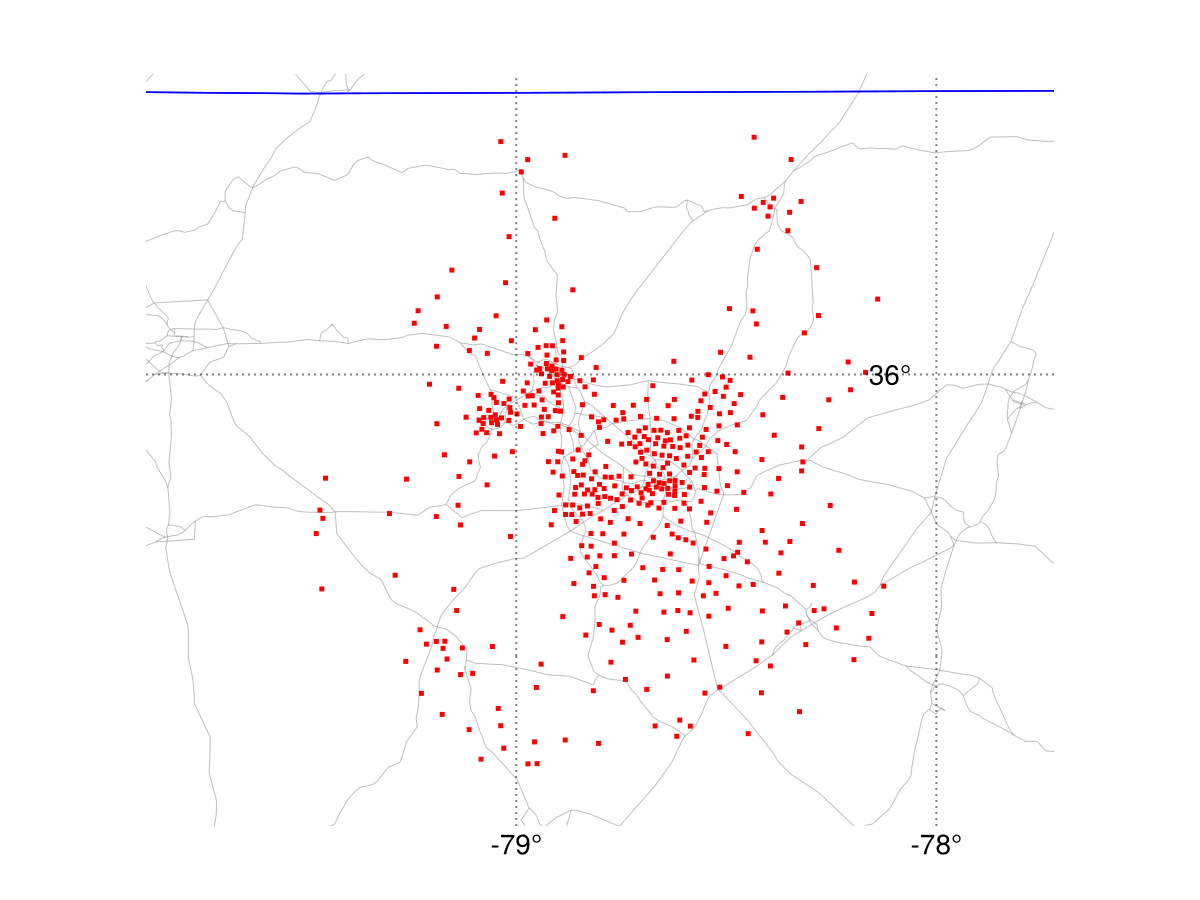

In [31]:
using Logjam.DataTools, Logjam.MapTools
using GeoMakie, DataFrames

fig, ax = makemap(df.LON, df.LAT)
scatter!(ax, df.LON, df.LAT; marker='.', markersize=24, color=:red)
fig

In [149]:
using DataFrames, CSV

df2 = DataFrame(CSV.File("ACSDT5Y2022.B19301-Data.csv"; skipto=3))

2672×5 DataFrame
  Row │ GEO_ID                NAME                               B19301_001E   ⋯
      │ String31              String                             String7       ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 1400000US37001020100  Census Tract 201; Alamance Count…  36384         ⋯
    2 │ 1400000US37001020200  Census Tract 202; Alamance Count…  16999
    3 │ 1400000US37001020301  Census Tract 203.01; Alamance Co…  19562
    4 │ 1400000US37001020302  Census Tract 203.02; Alamance Co…  20704
    5 │ 1400000US37001020400  Census Tract 204; Alamance Count…  20015         ⋯
    6 │ 1400000US37001020501  Census Tract 205.01; Alamance Co…  24850
    7 │ 1400000US37001020502  Census Tract 205.02; Alamance Co…  19246
    8 │ 1400000US37001020601  Census Tract 206.01; Alamance Co…  61114
    9 │ 1400000US37001020602  Census Tract 206.02; Alamance Co…  51589         ⋯
   10 │ 1400000US37001020701  Census Tract 207.01; Alamance Co…  38817
   11 │ 1400000US37001020702  Census Tract 207.02; Alamance Co…  29886
  ⋮   │          ⋮                            ⋮                       ⋮        ⋱
 2663 │ 1400000US37197050401  Census Tract 504.01; Yadkin Coun…  23902
 2664 │ 1400000US37197050402  Census Tract 504.02; Yadkin Coun…  33335         ⋯
 2665 │ 1400000US37197050502  Census Tract 505.02; Yadkin Coun…  34428
 2666 │ 1400000US37197050503  Census Tract 505.03; Yadkin Coun…  38967
 2667 │ 1400000US37197050504  Census Tract 505.04; Yadkin Coun…  26043
 2668 │ 1400000US37199960101  Census Tract 9601.01; Yancey Cou…  27475         ⋯
 2669 │ 1400000US37199960102  Census Tract 9601.02; Yancey Cou…  24059
 2670 │ 1400000US37199960200  Census Tract 9602; Yancey County…  37263
 2671 │ 1400000US37199960300  Census Tract 9603; Yancey County…  27370
 2672 │ 1400000US37199960400  Census Tract 9604; Yancey County…  33662         ⋯
                                                 2 columns and 2651 rows omitted

In [150]:
df2.GEO_ID = replace.(df2.GEO_ID, r"1400000US" => "")
first(df2, 5)

5×5 DataFrame
 Row │ GEO_ID       NAME                               B19301_001E  B19301_001 ⋯
     │ String       String                             String7      String7    ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 37001020100  Census Tract 201; Alamance Count…  36384        6984       ⋯
   2 │ 37001020200  Census Tract 202; Alamance Count…  16999        2944
   3 │ 37001020301  Census Tract 203.01; Alamance Co…  19562        2140
   4 │ 37001020302  Census Tract 203.02; Alamance Co…  20704        5129
   5 │ 37001020400  Census Tract 204; Alamance Count…  20015        2418       ⋯
                                                               2 columns omitted

In [151]:
rename!(df2, names(df2)[3] => :INCOME)
first(df2, 5)

5×5 DataFrame
 Row │ GEO_ID       NAME                               INCOME   B19301_001M  C ⋯
     │ String       String                             String7  String7      M ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 37001020100  Census Tract 201; Alamance Count…  36384    6984         m ⋯
   2 │ 37001020200  Census Tract 202; Alamance Count…  16999    2944         m
   3 │ 37001020301  Census Tract 203.01; Alamance Co…  19562    2140         m
   4 │ 37001020302  Census Tract 203.02; Alamance Co…  20704    5129         m
   5 │ 37001020400  Census Tract 204; Alamance Count…  20015    2418         m ⋯
                                                                1 column omitted

In [152]:
df2.INCOME = parse.(Int64, df2.INCOME)

LoadError: ArgumentError: input string is empty or only contains whitespace

In [153]:
sum(ismissing.(df2.INCOME))

0

In [154]:
df2 = filter(r -> try parse(Int, r.INCOME); true catch; false end, df2)

2647×5 DataFrame
  Row │ GEO_ID       NAME                               INCOME   B19301_001M   ⋯
      │ String       String                             String7  String7       ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 37001020100  Census Tract 201; Alamance Count…  36384    6984          ⋯
    2 │ 37001020200  Census Tract 202; Alamance Count…  16999    2944         
    3 │ 37001020301  Census Tract 203.01; Alamance Co…  19562    2140         
    4 │ 37001020302  Census Tract 203.02; Alamance Co…  20704    5129         
    5 │ 37001020400  Census Tract 204; Alamance Count…  20015    2418          ⋯
    6 │ 37001020501  Census Tract 205.01; Alamance Co…  24850    2746         
    7 │ 37001020502  Census Tract 205.02; Alamance Co…  19246    2246         
    8 │ 37001020601  Census Tract 206.01; Alamance Co…  61114    9256         
    9 │ 37001020602  Census Tract 206.02; Alamance Co…  51589    14215         ⋯
   10 │ 37001020701  Census Tract 207.01; Alamance Co…  38817    6114         
   11 │ 37001020702  Census Tract 207.02; Alamance Co…  29886    5312         
  ⋮   │      ⋮                       ⋮                     ⋮          ⋮        ⋱
 2638 │ 37197050401  Census Tract 504.01; Yadkin Coun…  23902    5581         
 2639 │ 37197050402  Census Tract 504.02; Yadkin Coun…  33335    5934          ⋯
 2640 │ 37197050502  Census Tract 505.02; Yadkin Coun…  34428    4901         
 2641 │ 37197050503  Census Tract 505.03; Yadkin Coun…  38967    12531        
 2642 │ 37197050504  Census Tract 505.04; Yadkin Coun…  26043    5041         
 2643 │ 37199960101  Census Tract 9601.01; Yancey Cou…  27475    4463          ⋯
 2644 │ 37199960102  Census Tract 9601.02; Yancey Cou…  24059    3132         
 2645 │ 37199960200  Census Tract 9602; Yancey County…  37263    6344         
 2646 │ 37199960300  Census Tract 9603; Yancey County…  27370    4168         
 2647 │ 37199960400  Census Tract 9604; Yancey County…  33662    5335          ⋯
                                                  1 column and 2626 rows omitted

In [155]:
df2.INCOME = parse.(Int64, df2.INCOME)
first(df2, 5)

5×5 DataFrame
 Row │ GEO_ID       NAME                               INCOME  B19301_001M  Co ⋯
     │ String       String                             Int64   String7      Mi ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 37001020100  Census Tract 201; Alamance Count…   36384  6984         mi ⋯
   2 │ 37001020200  Census Tract 202; Alamance Count…   16999  2944         mi
   3 │ 37001020301  Census Tract 203.01; Alamance Co…   19562  2140         mi
   4 │ 37001020302  Census Tract 203.02; Alamance Co…   20704  5129         mi
   5 │ 37001020400  Census Tract 204; Alamance Count…   20015  2418         mi ⋯
                                                                1 column omitted

In [156]:
first(df, 5)

5×11 DataFrame
 Row │ STFIP  COFIP  TRFIP  ST       LAT      LON       POP    ALAND    AWATER ⋯
     │ Int64  Int64  Int64  String3  Float64  Float64   Int64  Float64  Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    37     37  20103  NC       35.8423  -79.0516   5520   10.992    0.04 ⋯
   2 │    37     37  20104  NC       35.7866  -79.0695   6082   15.811    0.32
   3 │    37     37  20105  NC       35.831   -79.1109   7944    8.748    0.04
   4 │    37     37  20107  NC       35.8447  -79.1709   2643   19.508    0.24
   5 │    37     37  20108  NC       35.8029  -79.1364   1949   10.88     0.26 ⋯
                                                               3 columns omitted

In [134]:
df.GEO_ID = string.(df.STFIP, pad=2) .* string.(df.COFIP, pad=3) .* string.(df.TRFIP, pad=6)
first(df, 5)

5×11 DataFrame
 Row │ STFIP  COFIP  TRFIP  ST       LAT      LON       POP    ALAND    AWATER ⋯
     │ Int64  Int64  Int64  String3  Float64  Float64   Int64  Float64  Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    37     37  20103  NC       35.8423  -79.0516   5520   10.992    0.04 ⋯
   2 │    37     37  20104  NC       35.7866  -79.0695   6082   15.811    0.32
   3 │    37     37  20105  NC       35.831   -79.1109   7944    8.748    0.04
   4 │    37     37  20107  NC       35.8447  -79.1709   2643   19.508    0.24
   5 │    37     37  20108  NC       35.8029  -79.1364   1949   10.88     0.26 ⋯
                                                               3 columns omitted

In [167]:
df3 = leftjoin(df, df2[!, [:GEO_ID, :INCOME]], on=:GEO_ID)
df3

491×12 DataFrame
 Row │ STFIP  COFIP  TRFIP   ST       LAT      LON       POP    ALAND    AWATE ⋯
     │ Int64  Int64  Int64   String3  Float64  Float64   Int64  Float64  Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    37     37   20103  NC       35.8423  -79.0516   5520   10.992    0.0 ⋯
   2 │    37     37   20104  NC       35.7866  -79.0695   6082   15.811    0.3
   3 │    37     37   20105  NC       35.831   -79.1109   7944    8.748    0.0
   4 │    37     37   20107  NC       35.8447  -79.1709   2643   19.508    0.2
   5 │    37     37   20108  NC       35.8029  -79.1364   1949   10.88     0.2 ⋯
   6 │    37     37   20201  NC       35.7996  -79.454    3007   59.115    0.4
   7 │    37     37   20202  NC       35.7977  -79.2612   3382   47.904    0.3
   8 │    37     37   20203  NC       35.7311  -79.3019   2409   52.516    0.1
   9 │    37     37   20300  NC       35.6923  -79.4761   2742   55.849    0.2 ⋯
  10 │    37     37   20401  NC       35.7218  -79.4603   5835    7.059    0.0
  11 │    37     37   20402  NC       35.7378  -79.4674   4610   10.211    0.1
  ⋮  │   ⋮      ⋮      ⋮        ⋮        ⋮        ⋮        ⋮       ⋮        ⋮  ⋱
 482 │    37    183   54305  NC       35.831   -78.3178   3551    4.759    0.0
 483 │    37    183   54306  NC       35.8137  -78.3207   3635   10.872    0.0 ⋯
 484 │    37    183   54402  NC       35.769   -78.394    8201   15.676    0.0
 485 │    37    183   54403  NC       35.8356  -78.4153   4159   12.991    0.1
 486 │    37    183   54404  NC       35.7991  -78.3756   6927   11.245    0.0
 487 │    37    183   54501  NC       35.7417  -78.6602   5763    1.411    0.0 ⋯
 488 │    37    183   54502  NC       35.7528  -78.6486   3898    3.649    0.0
 489 │    37     63  980100  NC       35.8935  -78.8744      9    8.1      0.0
 490 │    37    183  980100  NC       35.8708  -78.7823      2    7.239    0.1
 491 │    37    183  980200  NC       35.8655  -78.749       0    8.252    0.1 ⋯
                                                  4 columns and 470 rows omitted

In [168]:
sum(ismissing.(df3.INCOME))

3

In [169]:
df3 = filter(r -> !ismissing(r.INCOME), df3)
df3.INCOME = Int64.(df3.INCOME)
df3

488×12 DataFrame
 Row │ STFIP  COFIP  TRFIP  ST       LAT      LON       POP    ALAND    AWATER ⋯
     │ Int64  Int64  Int64  String3  Float64  Float64   Int64  Float64  Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    37     37  20103  NC       35.8423  -79.0516   5520   10.992    0.04 ⋯
   2 │    37     37  20104  NC       35.7866  -79.0695   6082   15.811    0.32
   3 │    37     37  20105  NC       35.831   -79.1109   7944    8.748    0.04
   4 │    37     37  20107  NC       35.8447  -79.1709   2643   19.508    0.24
   5 │    37     37  20108  NC       35.8029  -79.1364   1949   10.88     0.26 ⋯
   6 │    37     37  20201  NC       35.7996  -79.454    3007   59.115    0.48
   7 │    37     37  20202  NC       35.7977  -79.2612   3382   47.904    0.37
   8 │    37     37  20203  NC       35.7311  -79.3019   2409   52.516    0.11
   9 │    37     37  20300  NC       35.6923  -79.4761   2742   55.849    0.27 ⋯
  10 │    37     37  20401  NC       35.7218  -79.4603   5835    7.059    0.04
  11 │    37     37  20402  NC       35.7378  -79.4674   4610   10.211    0.14
  ⋮  │   ⋮      ⋮      ⋮       ⋮        ⋮        ⋮        ⋮       ⋮        ⋮   ⋱
 479 │    37    183  54224  NC       35.9754  -78.5003   4651    1.582    0.05
 480 │    37    183  54303  NC       35.8826  -78.3859   2783   21.117    0.11 ⋯
 481 │    37    183  54304  NC       35.86    -78.3206   5628   15.01     0.07
 482 │    37    183  54305  NC       35.831   -78.3178   3551    4.759    0.07
 483 │    37    183  54306  NC       35.8137  -78.3207   3635   10.872    0.08
 484 │    37    183  54402  NC       35.769   -78.394    8201   15.676    0.03 ⋯
 485 │    37    183  54403  NC       35.8356  -78.4153   4159   12.991    0.12
 486 │    37    183  54404  NC       35.7991  -78.3756   6927   11.245    0.03
 487 │    37    183  54501  NC       35.7417  -78.6602   5763    1.411    0.01
 488 │    37    183  54502  NC       35.7528  -78.6486   3898    3.649    0.01 ⋯
                                                  4 columns and 467 rows omitted

In [172]:
(2/3)*sqrt(100.)/pi

2.1220659078919377

In [2]:
x = [2,4,2]
y = [33,44,55]
y[argmax(x)]

44

In [3]:
argmin(x)

1

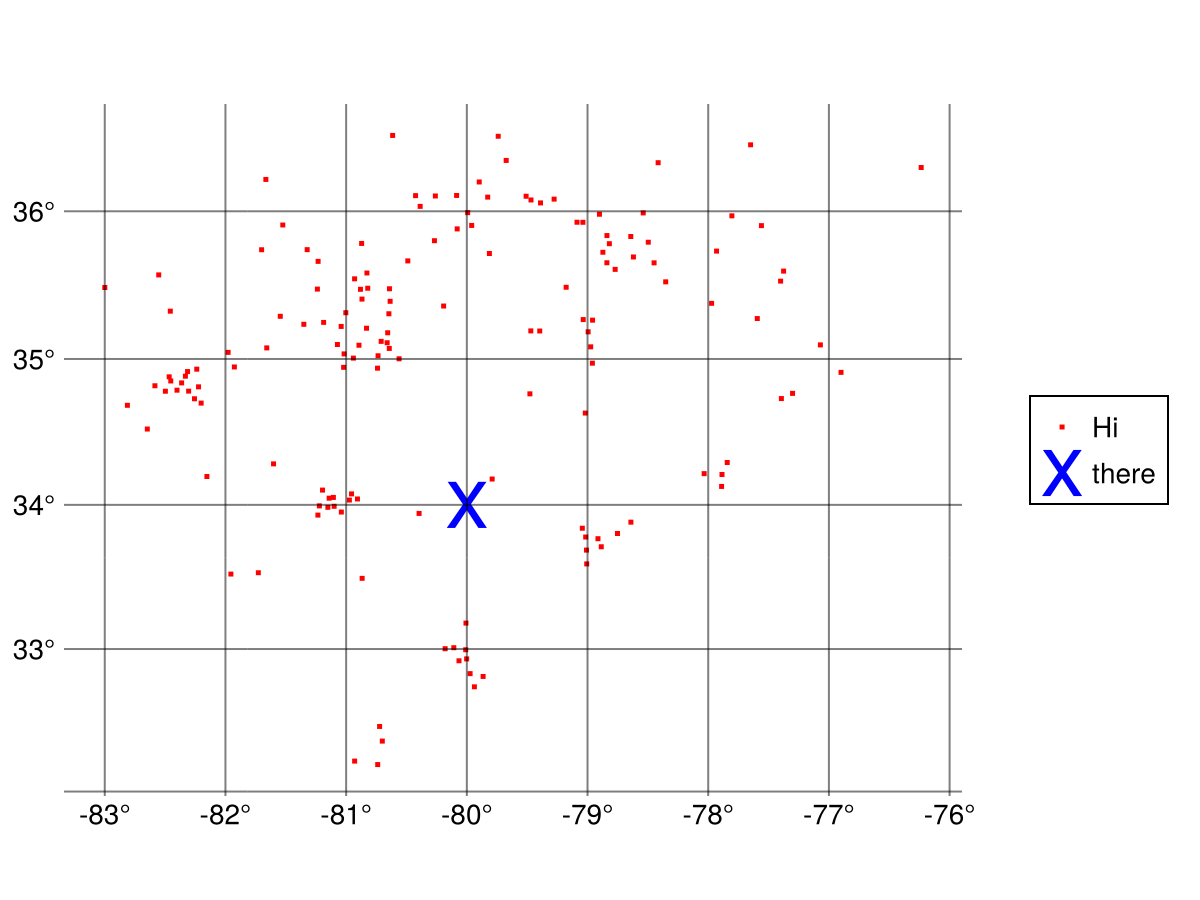

In [44]:
using Logjam.DataTools, Logjam.MapTools
using GeoMakie, DataFrames

df = filter!(r -> any(i -> r.STFIP == i, st2fips.([:NC,:SC])) && 
    r.POP > 10_000, usplace())
select!(df, :NAME, :ST, :LAT, :LON, :POP)

# fig, ax = makemap(df.LON, df.LAT; xexpand=0.1)

# Create a named tuple for marker properties
marker_props = (marker = '.', markersize = 24, color = :red, label="Hi")

# Create a figure and a GeoAxis with Mercator projection
fig = Figure()
ax = GeoAxis(fig[1, 1]; dest="+proj=merc")

# Use the named tuple with splatting for scatter!
h = []
push!(h, scatter!(ax, df.LON, df.LAT; marker_props...))
push!(h, scatter!(ax,-80.,34, marker = 'x', markersize = 44, color = :blue, label="there"))

#h = [h1,h2]
#Legend(fig[1,2], h, [h1.label,h2.label])
Legend(fig[1,2], h, [x.label for x in h])

# Display the figure
fig

In [40]:
labels = [x.label for x in h]

2-element Vector{Observable{Any}}:
 Observable{Any}("Hi")
 Observable{Any}("there")

In [17]:
using DataFrames, CSV

matrix = [1 2 3; 4 5 6; 7 8 9]

# Convert the matrix to a DataFrame
df = DataFrame(matrix, :auto)  # ':auto' automatically names the columns

3×3 DataFrame
 Row │ x1     x2     x3    
     │ Int64  Int64  Int64 
─────┼─────────────────────
   1 │     1      2      3
   2 │     4      5      6
   3 │     7      8      9

In [18]:
CSV.write("matrix_output.csv", df)

"matrix_output.csv"

In [19]:
df = DataFrame(CSV.File("matrix_output.csv"))

3×3 DataFrame
 Row │ x1     x2     x3    
     │ Int64  Int64  Int64 
─────┼─────────────────────
   1 │     1      2      3
   2 │     4      5      6
   3 │     7      8      9

In [20]:
matrix = Matrix(df)

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [7]:
using Logjam.DataTools, DataFrames, CSV

S = DataFrame(CSV.File("HW5data-plant.csv"))

12×4 DataFrame
 Row │ City             State    ProdCost  DistCost 
     │ String15         String3  Int64     Int64    
─────┼──────────────────────────────────────────────
   1 │ Pueblo           CO        2181633    884777
   2 │ Colonia          NJ        6843040   2210017
   3 │ Lubbock          TX         586417    144603
   4 │ Niles            OH        3811055   1356737
   5 │ Livermore        CA        3329137    315428
   6 │ Vancouver        WA        2846157    677024
   7 │ Palestine        TX        5573486   1956309
   8 │ Diamond Bar      CA        3289147    744632
   9 │ Doctor Phillips  FL        3986378   1095356
  10 │ Stillwater       OK        2942617   1155570
  11 │ Gainesville      GA        6661509   3236088
  12 │ Elkhorn          WI        6098870   1697663

In [16]:
function name2lonlat(name, st, df)
    idx = findfirst(r -> startswith(r[:NAME], name) && r.ST == st, eachrow(df))
    if idx === nothing
        error("'$name', '$st' not found in $df")
    end
    return collect(df[idx, [:LON, :LAT]])
end

#name2lonlat("Pueblo","CO", usplace())

X = vcat([name2lonlat(i, j, usplace())' for (i,j) in zip(S.City, S.State)]...)


12×2 Matrix{Float64}:
 -104.611   38.2699
  -74.3114  40.5893
 -101.888   33.5668
  -80.7531  41.1878
 -121.76    37.687
 -122.597   45.6372
  -95.647   31.7545
 -117.818   34.0016
  -81.4905  28.4433
  -97.0745  36.1315
  -83.8291  34.2901
  -88.5363  42.6716

In [17]:
C = DataFrame(CSV.File("HW5data-cust.csv"))

275×2 DataFrame
 Row │ Zip    Demand 
     │ Int64  Int64  
─────┼───────────────
   1 │ 16335     400
   2 │  7450    2840
   3 │ 33034    2367
   4 │ 27360     281
   5 │ 80615    1521
   6 │ 22042     814
   7 │ 33870    1715
   8 │ 30040     462
   9 │ 13620     302
  10 │ 77566    2845
  11 │ 44691     449
  ⋮  │   ⋮      ⋮
 266 │ 48336    2583
 267 │ 12960     402
 268 │ 84645     773
 269 │  8005    4806
 270 │ 97146    2243
 271 │ 53221     951
 272 │ 43206    1541
 273 │ 78962     594
 274 │ 33460    3470
 275 │  3257    3008
     254 rows omitted

In [18]:
function zcta52lonlat(zcta5, df)
    idx = findfirst(r -> r.ZCTA5 == zcta5, eachrow(df))
    if idx === nothing
        error("'$zcta5' not found in $df")
    end
    return collect(df[idx, [:LON, :LAT]])
end

P = vcat([zcta52lonlat(i, uszcta5())' for i in C.Zip]...)

275×2 Matrix{Float64}:
  -80.1536  41.6306
  -74.1135  40.9816
  -80.7733  25.4722
  -80.0993  35.8606
 -104.646   40.5457
  -77.1939  38.8651
  -81.3677  27.5033
  -84.1764  34.2234
  -75.4483  43.9088
  -95.4744  29.0527
  -81.9776  40.806
  -97.6733  30.3836
 -111.122   32.1284
    ⋮       
  -82.2643  38.8218
 -119.41    35.1676
  -83.3481  42.4633
  -73.5723  44.0158
 -111.84    39.8605
  -74.3066  39.7558
 -123.911   46.1251
  -87.9433  42.9539
  -82.9742  39.9425
  -96.7345  29.6744
  -80.0558  26.6184
  -71.9906  43.4177

## 2. MILP Formulation of UFL
### Ex: Same example used in `Loc 5`
Data: Asheville, Statesville, Greensboro, Raleigh, and Wilmington.

In [21]:
d1(x1, x2) = length(x1) == length(x2) ? sum(abs.(x1 .- x2)) : 
    error("Inputs not same length.")
D1(X₁, X₂) = [d1(i, j) for i in eachrow(X₁), j in eachrow(X₂)]

P = [50 150 220 295 420]'
r, f = 1, 1
w = r * f
k = [150, 200, 150, 150, 200]
C = w * D1(P, P)

5×5 Matrix{Int64}:
   0  100  170  245  370
 100    0   70  145  270
 170   70    0   75  200
 245  145   75    0  125
 370  270  200  125    0

In [22]:
K = 2

2

In [24]:
using JuMP, Cbc

n, m = size(C)
N, M = 1:n, 1:m
model = Model(Cbc.Optimizer)
@variable(model, y[N], Bin)
@variable(model, 0 <= x[N, M] <= 1)
@objective(model, Min, 
    sum(k[i]*y[i] for i ∈ N) + sum(C[i,j]*x[i,j] for i ∈ N, j ∈ M))
@constraint(model, [j ∈ M], sum(x[i,j] for i ∈ N) == 1)
@constraint(model, [i ∈ N], K*y[i] >= sum(f*x[i,j] for j ∈ M))
@constraint(model, y[5] == 1)
set_attribute(model, "logLevel", 0)
optimize!(model)
TCᵒ, yᵒ, xᵒ = objective_value(model), value.(y), value.(x)
println("\nObj: ", TCᵒ, "\n  y: ", yᵒ, "\n  x: ", xᵒ, "\n")


Obj: 675.0
  y: 1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 1:5
And data, a 5-element Vector{Float64}:
 1.0
 0.0
 1.0
 0.0
 1.0
  x: 2-dimensional DenseAxisArray{Float64,2,...} with index sets:
    Dimension 1, 1:5
    Dimension 2, 1:5
And data, a 5×5 Matrix{Float64}:
 1.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0



In [9]:
using SparseArrays, Optim

d1(x1, x2) = length(x1) == length(x2) ? sum(abs.(x1 .- x2)) : 
    error("Inputs not same length.")
D1(X₁, X₂) = [d1(i, j) for i in eachrow(X₁), j in eachrow(X₂)]

P = [50 150 190 220 270 295 420]'
X₀ = [60.; 125.; 130.]
m, n = size(P, 1), size(X₀, 1)
w = ones(m)

D1(X₀,P)
TC(W, X) = sum(W .* D1(X, P))
alloc(X) = sparse([argmin(c) for c in eachcol(D1(X, P))], 1:m, w, n, m)
loc(W, X₀) = optimize(X -> TC(W, X), X₀).minimizer

W = alloc(X₀)
loc(W, X₀)

3-element Vector{Float64}:
  50.000000018761945
  77.60787739679037
 229.50387094052564

In [ ]:


function ala(Xᵒ)            # Input initial location
    TCᵒ, done = Inf, false
    while !done
        W = alloc(Xᵒ)       # Allocate
        X′ = loc(W, Xᵒ)     # Locate
        TC′ = TC(W, X′)
        println(TC′, X′)
        if TC′ < TCᵒ
            TCᵒ, Xᵒ = TC′, X′
        else
            done = true
        end
    end
end

ala(X₀)

In [1]:
using DataFrames, CSV

C = Matrix(DataFrame(CSV.File("PopcoCmatrix.csv")))

204×162 Matrix{Float64}:
 5.92658e5  9.64745e5  1.292e7    4.46354e6  …  3.73774e7       1.87629e6
 2.47632e6  2.05098e5  1.27387e7  3.90231e6     3.51108e7       1.74961e6
 3.26274e6  1.25328e6  2.56588e6  3.06537e6     3.17408e7       1.56637e6
 1.00004e7  3.40615e6  2.71957e7  3.51524e5     1.97778e7       9.04456e5
 9.55826e6  3.22017e6  2.55531e7  3.51524e5     2.05911e7       9.49078e5
 6.9755e6   2.00204e6  1.79764e7  1.80016e6  …  2.62702e7       1.262e6
 1.34957e7  4.59604e6  4.19432e7  1.82073e6     1.51729e7       6.56167e5
 1.36062e7  4.74373e6  4.16259e7  1.62926e6     1.36833e7       5.67583e5
 1.2975e7   4.57954e6  3.87712e7  1.34531e6     1.44956e7       6.13991e5
 1.5991e7   5.66665e6  5.10211e7  2.68552e6     9.64018e6       3.47211e5
 1.695e7    5.94058e6  5.54607e7  3.25191e6  …  1.03528e7       4.20822e5
 4.34985e6  2.24362e6  1.23272e7  3.8397e6      3.37139e7       1.68301e6
 2.1192e7   9.04313e6  8.17951e7  1.04155e7     5.11748e7       2.71901e6
 ⋮             

In [4]:
spy(C)

LoadError: UndefVarError: `spy` not defined

In [5]:
using WGLMakie

fig = scatter(rand(4))
ax = fig.axis

# Adjust limits for panning
ax.limits[] = ((-1.0, 2.0), (-1.0, 2.0))  # New axis limits

fig


In [10]:
using WGLMakie

# Create a plot
fig = scatter(rand(10), rand(10), color=:blue, markersize=15)

# Save the plot as a standalone HTML file
save("popout_plot.html", fig)

# Instructions: Manually open "popout_plot.html" in a browser to view it.

fig

LoadError: IOError: unlink("C:\\Users\\kay\\Documents\\G_Drive\\My Drive\\ISE754\\2. Location\\popout_plot.html"): resource busy or locked (EBUSY)

IOStream(<file popout_plot.html>)

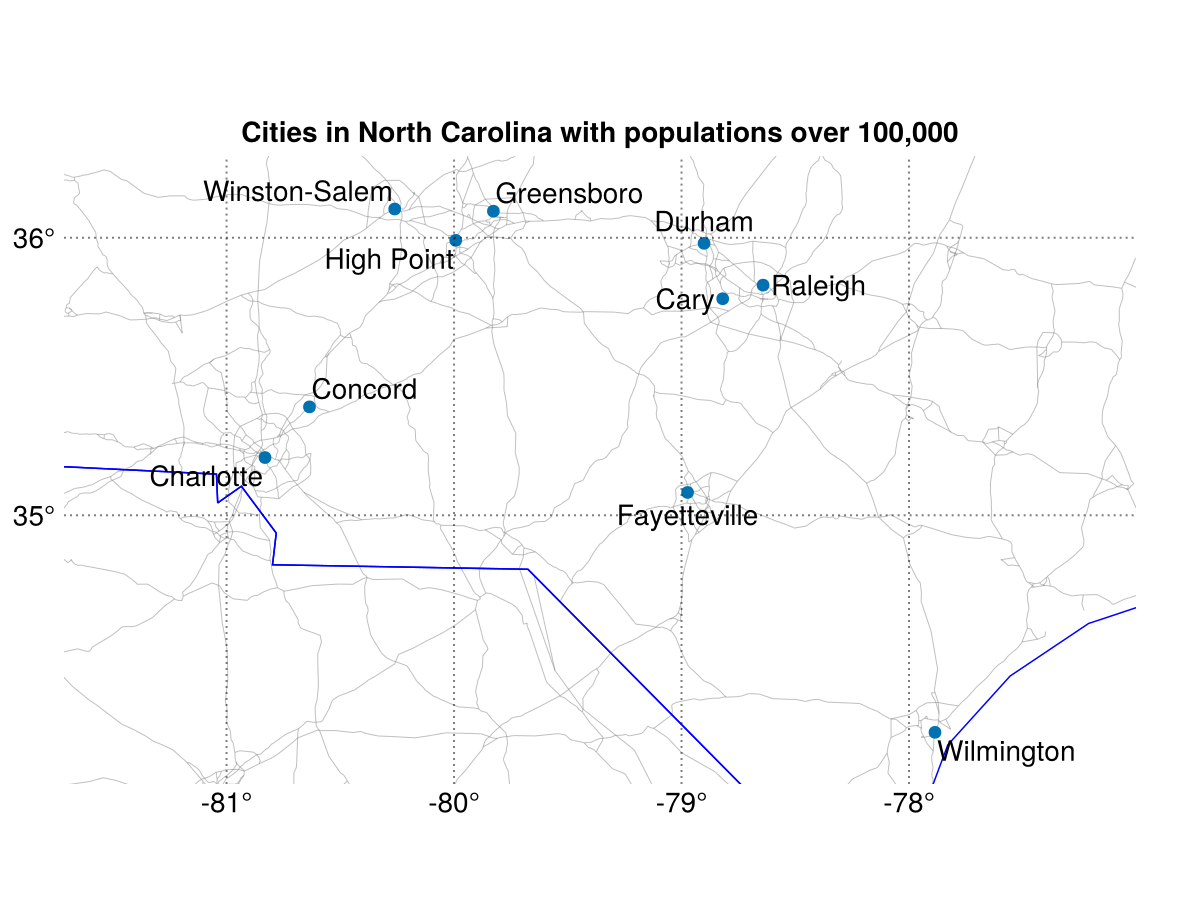

In [11]:
using Logjam.DataTools, Logjam.MapTools
using GeoMakie, DataFrames, WGLMakie

# Filter U.S. place data for cities in North Carolina with populations over 100,000
df = filter(r -> (r.STFIP == st2fips(:NC)) && (r.POP > 100_000), usplace())

# Extract longitude, latitude, and city names from dataframe
x, y, name = df.LON, df.LAT, df.NAME

# Create and title a map figure and axis
fig, ax = makemap(x, y)
WGLMakie.activate_interaction!()
ax.title = "Cities in North Carolina with populations over 100,000"

# Plot cities as scatter points
scatter!(ax, x, y)

# Annotate the scatter plot with city names
text!(ax, x, y, text=name; aligntext(x, y)...)

# Display the map
display(fig);